## Bibliotecas e carregando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import datetime as dt
import os
import folium

#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#.preprocessing import Imputer
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectFromModel
#from sklearn.utils import shuffle
#from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', 100)

month_num = str(7)
path_to_save = './Tempo-Clima/Analise_dados/'

if not os.path.exists(str(path_to_save+month_num)):
    os.makedirs(str(path_to_save+month_num))
    os.makedirs(str(path_to_save+month_num+'/recovery_data_analise/'))
data = pd.read_csv('./Tempo-Clima/Dados/EMA/Unidos_v2/Brasil_v2/Brasil_'+month_num+'_v4.csv')
#data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

# Qual o tamanho da base?

In [2]:
data.shape

(3426504, 29)

# Retirando duplicações de dados e verificando o tamanho novamente

In [3]:
data.drop_duplicates()
data.shape

(3426504, 29)

# Informações da base

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426504 entries, 0 to 3426503
Data columns (total 29 columns):
Altitude(metros)                              float64
Codigo OMM                                    float64
Day                                           int64
H(UTC)                                        int64
Latitude                                      float64
Longitude                                     float64
Month                                         int64
Nome                                          object
PRECIPITACAO (mm)                             float64
PRESSAO ATMOSFERICA (hPa)                     float64
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              float64
PRESSAO ATMOSFÉRICA MINIMA (hPa)              float64
RADIACAO GLOBAL (KJ/M2)                       float64
TEMPERATURA DO AR (C)                         float64
TEMPERATURA DO PONTO DE ORVALHO (C)           float64
TEMPERATURA MAXIMA (C)                        float64
TEMPERATURA MINIMA (C)        

In [5]:
data.describe().T

count          mean  \
Altitude(metros)                            3426504.0    344.395516   
Codigo OMM                                  3422040.0  85354.921976   
Day                                         3426504.0     16.034804   
H(UTC)                                      3426504.0     11.500000   
Latitude                                    3426504.0    -15.846952   
Longitude                                   3426504.0    -47.752958   
Month                                       3426504.0      7.000000   
PRECIPITACAO (mm)                           3067230.0      0.077321   
PRESSAO ATMOSFERICA (hPa)                   3123047.0    968.961321   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            3121371.0    969.210456   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            3121401.0    968.698096   
RADIACAO GLOBAL (KJ/M2)                     1523266.0   1273.695588   
TEMPERATURA DO AR (C)                       3135572.0     20.931332   
TEMPERATURA DO PONTO DE ORVALHO (C)         3100852.0     14.182142   
TEMPERATURA MAXIMA (C)                      3135356.0     21.620694   
TEMPERATURA MINIMA (C)                      3135191.0     20.267689   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  3102526.0     14.698608   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  3099642.0     13.678765   
UMIDADE RELATIVA DO AR (%)                  3105501.0     69.547916   
UMIDADE RELATIVA DO MAXIMA AR (%)           3105452.0     72.297301   
UMIDADE RELATIVA DO MINIMA AR (%)           3102895.0     66.722282   
VENTO VELOCIDADE                            3068031.0      2.047270   
VENTO, DIRECAO (graus)                      3042987.0    151.291849   
VENTO, RAJADA MAXIMA (m/s)                  3065480.0      4.769771   
Year                                        3426504.0   2011.456073   

                                                    std           min  \
Altitude(metros)                             287.637865      1.001000   
Codigo OMM                                  2260.372354  81609.000000   
Day                                            8.943201      1.000000   
H(UTC)                                         6.922188      0.000000   
Latitude                                       8.158203    -33.742297   
Longitude                                      6.909263    -72.786778   
Month                                          0.000000      7.000000   
PRECIPITACAO (mm)                              0.662517      0.000000   
PRESSAO ATMOSFERICA (hPa)                     38.032959    808.500000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              38.046381    809.500000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              38.023576    808.200000   
RADIACAO GLOBAL (KJ/M2)                     1022.390975      0.000000   
TEMPERATURA DO AR (C)                          6.442990     -9.800000   
TEMPERATURA DO PONTO DE ORVALHO (C)            5.145334    -37.500000   
TEMPERATURA MAXIMA (C)                         6.546466     -9.900000   
TEMPERATURA MINIMA (C)                         6.327438    -10.000000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     5.094119    -29.900000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     5.207752    -33.500000   
UMIDADE RELATIVA DO AR (%)                    21.203135     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             20.498467      3.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             21.733463      3.000000   
VENTO VELOCIDADE                               1.762650      0.000000   
VENTO, DIRECAO (graus)                        92.547329      1.000000   
VENTO, RAJADA MAXIMA (m/s)                     3.109674      0.000000   
Year                                           3.232168   2000.000000   

                                                     25%           50%  \
Altitude(metros)                               75.000000    290.000000   
Codigo OMM                                  81976.000000  86729.000000   
Day                                             8.000000     16.000000   
H(UTC)

In [6]:
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      7   
1             185.0     81963.0    1       1 -9.358353 -69.926257      7   
2             185.0     81963.0    1       2 -9.358353 -69.926257      7   
3             185.0     81963.0    1       3 -9.358353 -69.926257      7   
4             185.0     81963.0    1       4 -9.358353 -69.926257      7   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
0                      989.7                             989.7   
1                      990.3                             990.3   
2                      990.5                             990.6   
3                      990.7                             990.9   
4                      990.6                             990.7   

   PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
0                             989.4                      NaN   
1                             989.7                      NaN   
2                             990.3                      NaN   
3                             990.5                      NaN   
4                             990.6                      NaN   

   TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0                   22.8                                 21.8   
1                   22.3                                 21.5   
2                   21.8                                 21.1   
3                   21.5                                 20.8   
4                   21.2                                 20.6   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0                    23.5                    22.8   
1                    22.8                    22.3   
2                    22.3                    21.8   
3                    21.9                    21.5   
4                    21.7                    21.1   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        22.3   
1                                        21.8   
2                                        21.5   
3                                        21.2   
4                                        21.0   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        21.8                        94.0   
1                                        21.5                        95.0   
2                                        21.1                        95.0   
3                                        20.8                        96.0   
4                                        20.5                        96.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                               94.0                               93.0   
1                               95.0                               94.0   
2                               95.0                               95.0   
3                               96.0                               95.0   
4                               96.0                               96.0   

   VENTO VELOCIDADE   VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  \
0                0.0                    34.0                         0.0   
1                0.0                   358.0                         0.0   
2                0.0                    46.0                         0.0   
3                0.0                    69.0                         1.2   
4                0.0                    49.0                         0.9   

   Year                     Cidade Estado Regiao  


In [7]:
data.tail(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
3426499               6.0     86618.0   31      19 -10.473959 -36.482051   
3426500               6.0     86618.0   31      20 -10.473959 -36.482051   
3426501               6.0     86618.0   31      21 -10.473959 -36.482051   
3426502               6.0     86618.0   31      22 -10.473959 -36.482051   
3426503               6.0     86618.0   31      23 -10.473959 -36.482051   

         Month               Nome  PRECIPITACAO (mm)  \
3426499      7  Brejo Grande-A421                NaN   
3426500      7  Brejo Grande-A421                NaN   
3426501      7  Brejo Grande-A421                NaN   
3426502      7  Brejo Grande-A421                NaN   
3426503      7  Brejo Grande-A421                NaN   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
3426499                     1016.5                            1016.5   
3426500                        NaN                               NaN   
3426501                        NaN                               NaN   
3426502                        NaN                               NaN   
3426503                        NaN                               NaN   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
3426499                            1016.3                 1875.747   
3426500                               NaN                      NaN   
3426501                               NaN                      NaN   
3426502                               NaN                      NaN   
3426503                               NaN                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
3426499                   26.7                                 20.1   
3426500                    NaN                                  NaN   
3426501                    NaN                                  NaN   
3426502                    NaN                                  NaN   
3426503                    NaN                                  NaN   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
3426499                    27.9                    26.7   
3426500                     NaN                     NaN   
3426501                     NaN                     NaN   
3426502                     NaN                     NaN   
3426503                     NaN                     NaN   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
3426499                                        20.8   
3426500                                         NaN   
3426501                                         NaN   
3426502                                         NaN   
3426503                                         NaN   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
3426499                                        19.8   
3426500                                         NaN   
3426501                                         NaN   
3426502                                         NaN   
3426503                                         NaN   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
3426499                        67.0                               69.0   
3426500                         NaN                                NaN   
3426501                         NaN                                NaN   
3426502                         NaN                                NaN   
3426503                         NaN                                NaN   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
3426499                               64.0                2.5   
3426500                                NaN                NaN   
3426501                                NaN                NaN   
3426502                                NaN                NaN   
3426503                                NaN                NaN   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
3426499     

# Temos muitos dados ausentes?

In [8]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.125150
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             11.400363
PRESSAO ATMOSFERICA (hPa)                      8.981375
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               9.031417
PRESSAO ATMOSFÉRICA MINIMA (hPa)               9.030532
RADIACAO GLOBAL (KJ/M2)                       55.855521
TEMPERATURA DO AR (C)                          8.657065
TEMPERATURA DO PONTO DE ORVALHO (C)            9.801163
TEMPERATURA MAXIMA (C)                         8.658925
TEMPERATURA MINIMA (C)                         8.659443
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

In [9]:
data.dropna().shape

(1332820, 29)

In [8]:
data.shape[0] - data.dropna().shape[0]

2009952

In [9]:
((data<0).sum()/len(data))*100

Altitude(metros)                                0.000000
Codigo OMM                                      0.000000
Day                                             0.000000
H(UTC)                                          0.000000
Latitude                                       99.283468
Longitude                                     100.000000
Month                                           0.000000
Nome                                          100.000000
PRECIPITACAO (mm)                               0.000000
PRESSAO ATMOSFERICA (hPa)                       0.000000
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                0.000000
PRESSAO ATMOSFÉRICA MINIMA (hPa)                0.000000
RADIACAO GLOBAL (KJ/M2)                         0.000000
TEMPERATURA DO AR (C)                           0.080549
TEMPERATURA DO PONTO DE ORVALHO (C)             0.659214
TEMPERATURA MAXIMA (C)                          0.055012
TEMPERATURA MINIMA (C)                          0.112564
TEMPERATURA MÁXIMA DO PONTO DE 

# Quais os valores minimos e maximos?

In [10]:
data.min()

Altitude(metros)                                      1.001
Codigo OMM                                            81609
Day                                                       1
H(UTC)                                                    0
Latitude                                           -33.7423
Longitude                                          -72.7868
Month                                                     7
Nome                                          Abrolhos-A422
PRECIPITACAO (mm)                                         0
PRESSAO ATMOSFERICA (hPa)                             808.5
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                      809.5
PRESSAO ATMOSFÉRICA MINIMA (hPa)                      808.2
RADIACAO GLOBAL (KJ/M2)                                   0
TEMPERATURA DO AR (C)                                  -9.8
TEMPERATURA DO PONTO DE ORVALHO (C)                   -37.5
TEMPERATURA MAXIMA (C)                                 -9.9
TEMPERATURA MINIMA (C)                  

In [11]:
data.max()

Altitude(metros)                                      997
Codigo OMM                                          86998
Day                                                    31
H(UTC)                                                 23
Latitude                                          3.81358
Longitude                                        -34.8156
Month                                                   7
Nome                                          Óbidos-A232
PRECIPITACAO (mm)                                    60.4
PRESSAO ATMOSFERICA (hPa)                          1049.9
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                   1049.9
PRESSAO ATMOSFÉRICA MINIMA (hPa)                     1050
RADIACAO GLOBAL (KJ/M2)                             37259
TEMPERATURA DO AR (C)                                43.2
TEMPERATURA DO PONTO DE ORVALHO (C)                  41.6
TEMPERATURA MAXIMA (C)                               43.7
TEMPERATURA MINIMA (C)                               42.7
TEMPERATURA MÁ

# Matriz de correlação dos dados

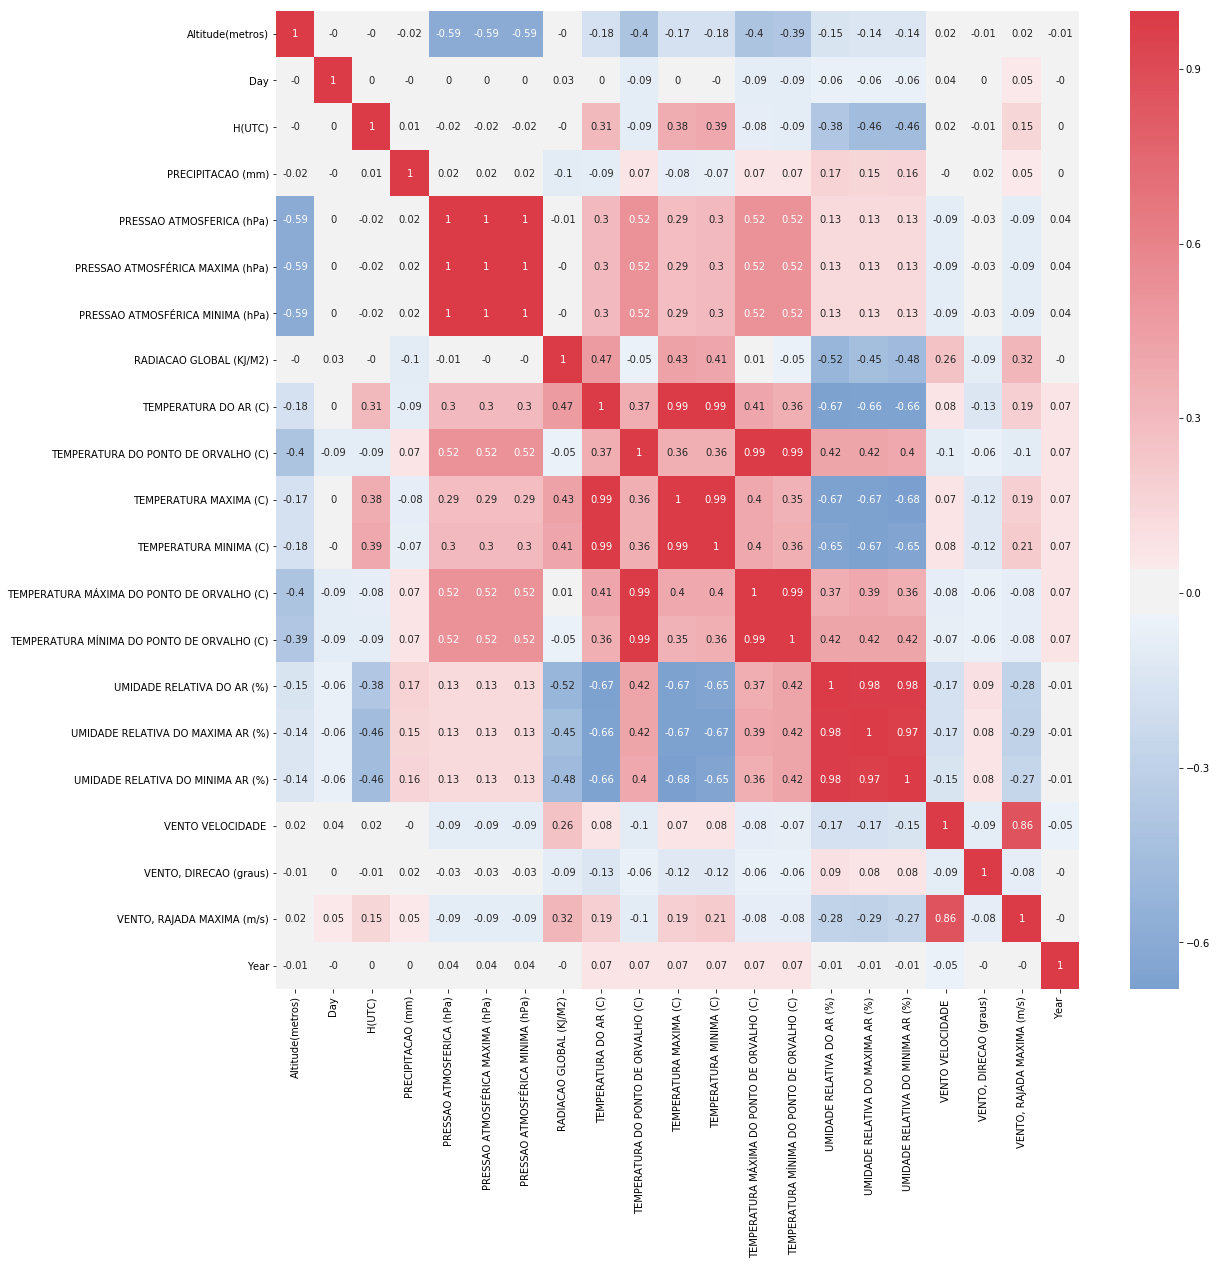

In [12]:
all_columns_num = data.columns.tolist()
all_columns_num.remove('Nome')
all_columns_num.remove('Month')
all_columns_num.remove('Latitude')
all_columns_num.remove('Longitude')
all_columns_num.remove('Codigo OMM')
all_columns_num.remove('Cidade')
all_columns_num.remove('Estado')
all_columns_num.remove('Regiao')
data_clean = data.dropna()
cor_matrix = data_clean[all_columns_num].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

## Fazendo um mapa para verificar como esta cada estação em relação a dados ausentes e a consistencias dos dados

In [13]:
def make_marker(name,lat,long,alt, temp_min,temp_max, temp_min_min,temp_min_max,
                temp_max_min,temp_max_max, prep_min,prep_max, ur_min,ur_max,
                ur_min_min,ur_min_max, ur_max_min,ur_max_max, miss_data_temp_min,
                miss_data_temp_max, miss_data_prep, miss_data_ur_min, miss_data_ur_max,
                miss_data_ur,color):
    return folium.Marker(location=[df_temp['Latitude'].unique()[0],df_temp['Longitude'].unique()[0]], 
                 popup='''
                 Name: {:s}
                 Latitude:{:f}
                 longitude:{:f}
                 Altitude(metros) : {:f}
                 Minimos e Maximos
                 
                 Temperatura do ar: {:f}\t{:f}
                 Temperatura Minima: {:f}\t{:F}
                 Temperatura Maxima:  {:f}\t{:f}
                 Precipitação: {:f}\t{:f}
                 Umidade Relativa: {:f}\t{:f}
                 UR Minima: {:f}\t{:f}
                 UR Maxima: {:f}\t{:f}
                 
                 Dados Ausentes
                 
                 Temperatura Minima: {:f}
                 Temperatura Maxima: {:f}
                 Precipitação: {:f}
                 UR Minima: {:f}
                 UR Maxima: {:f}
                 UR:{:f}
                 '''.format(name,lat,long,alt,
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur), 
                icon=folium.Icon(color=color))

### Problemas procurados

##### - Temperatura minima              > Temperatura Maxima
##### - Temperatura(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Temperatura minima do Ponto de Orvalho              > Temperatura Maxima do Ponto de Orvalho
##### - Temperatura do Ponto de Orvalho(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Umidade Relativa(min,max,do ar) < 0 OU Umidade Relativa(min,max,do ar)   >100
##### - Umidade relativa minima         > Umidade relativa maxima
##### - Dados ausentes > 30

In [14]:
#Grupo de marcadores para possivel problemas
fg_miss_data          =      folium.FeatureGroup(name='Miss Data')
fg_temp_inconsistency =      folium.FeatureGroup(name='Temp correlation Inconsistency')
fg_temp_min           =      folium.FeatureGroup(name='Temp minima Inconsistency')
fg_temp               =      folium.FeatureGroup(name='Temp air Inconsistency')
fg_temp_max           =      folium.FeatureGroup(name='Temp Maxima Inconsistency')
fg_ur_inconsistency   =      folium.FeatureGroup(name='Umildade Relatica Inconsistency')

df_miss_data = pd.DataFrame(columns = ['Estação','Md_temp_max','Md_temp_min','Md_temp','Md_ur_max','Md_ur_min','MD_ur','Md_prec'])

recovery_list = []
danger_list = []
temp_min_list = []
temp_max_list = []
temp_inconsistency_list = []
temp_list = []
ur_list = []

for name in data['Nome'].unique().tolist():
    
    df_temp = data.loc[lambda df: df.Nome == name, :]
    #Maximo e minimos
    temp_min     = df_temp['TEMPERATURA DO AR (C)'].min()
    temp_max     = df_temp['TEMPERATURA DO AR (C)'].max()
    temp_min_min = df_temp['TEMPERATURA MINIMA (C)'].min()
    temp_min_max = df_temp['TEMPERATURA MINIMA (C)'].max()
    temp_max_min = df_temp['TEMPERATURA MAXIMA (C)'].min()
    temp_max_max = df_temp['TEMPERATURA MAXIMA (C)'].max()
    prep_max     = df_temp['PRECIPITACAO (mm)'].max()
    prep_min     = df_temp['PRECIPITACAO (mm)'].min()
    ur_max       = df_temp['UMIDADE RELATIVA DO AR (%)'].max()
    ur_min       = df_temp['UMIDADE RELATIVA DO AR (%)'].min()
    ur_max_max   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].max()
    ur_max_min   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].min()
    ur_min_max   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].max()
    ur_min_min   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].min()
    #Dados ausentes
    miss_data_temp     = (df_temp['TEMPERATURA DO AR (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA DO AR (C)']))*100
    miss_data_temp_min = (df_temp['TEMPERATURA MINIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MINIMA (C)']))*100
    miss_data_temp_max = (df_temp['TEMPERATURA MAXIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MAXIMA (C)']))*100
    miss_data_prep     = (df_temp['PRECIPITACAO (mm)'].isnull().sum()/
                          len(df_temp['PRECIPITACAO (mm)']))*100
    miss_data_ur_min   = (df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MINIMA AR (%)']))*100
    miss_data_ur_max   = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']))*100
    miss_data_ur       = (df_temp['UMIDADE RELATIVA DO AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO AR (%)']))*100
    #Estações com 10% a 50% de dados ausentes poderão ser interpolados
    miss_recovery = (miss_data_temp> 10 and miss_data_temp < 30,
                      miss_data_temp_min> 10 and miss_data_temp_min < 30,
                      miss_data_prep > 10 and miss_data_prep< 30,
                      miss_data_temp_max > 10 and miss_data_temp_max < 30,
                      miss_data_ur > 10 and miss_data_ur < 30,
                      miss_data_ur_max > 10 and miss_data_ur_max < 30,
                      miss_data_ur_min > 10 and miss_data_ur_min < 30)
    #Estações com 50% ou mais de dados ausentes poderam ser eliminadas
    miss_danger = (miss_data_temp > 30,miss_data_temp_min> 30,miss_data_prep> 30,
                   miss_data_temp_max> 30,miss_data_ur> 30,
                   miss_data_ur_max> 30,miss_data_ur_min > 30)
    
    df_miss_data = df_miss_data.append(pd.DataFrame([name,miss_data_temp_max,miss_data_temp_min,miss_data_temp,miss_data_ur_max,
              miss_data_ur_min,miss_data_ur,miss_data_prep], index = df_miss_data.columns.tolist()).T)
    if miss_danger == (1,1,1,1,1,1,1):
        color = 'red'
        danger_list.append(name)
    elif True in miss_recovery:
        color = 'purple'
        recovery_list.append(name)
    else:
        color = 'green'
    fg_miss_data.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
        
    temp_inconsistency = (df_temp['TEMPERATURA MAXIMA (C)'] <= df_temp['TEMPERATURA MINIMA (C)'])
    
    if True in temp_inconsistency:
        color = 'red'
        temp_inconsistency_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_max_min < 0) or (temp_max_max > 45):
        color = 'red'
        temp_max_list.append(name)
    else:
        color = 'green'
    fg_temp_max.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min < 0) or (temp_max > 45):
        color = 'red'
        temp_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min_min < 0) or (temp_min_max > 45):
        color = 'red'
        temp_min_list.append(name)
    else:
        color = 'green'
    
    fg_temp_min.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    ur_min_danger = (ur_min < 0, ur_max_min < 0, ur_min_min < 0 )
    ur_max_danger = (ur_max >100,ur_max_max>100,ur_min_max>100)
    ur_inconsistency = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'] <= df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'])
   
    if (True in ur_min_danger) or (True in ur_max_danger) or (True in ur_inconsistency):
        color = 'red'
        ur_list.append(name)
    else:
        color = 'green'
    fg_ur_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))

map_miss_data          = folium.Map()
map_temp_inconsistency = folium.Map()
map_temp_min           = folium.Map()
map_temp_max           = folium.Map()
map_ur_inconsistency   = folium.Map()
map_miss_data.add_child(fg_miss_data).save(str(path_to_save+month_num+'/map_'+month_num+'_miss_data.html'))
map_temp_inconsistency.add_child(fg_temp_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_temp_incosistency.html')
map_temp_min.add_child(fg_temp_min).save(path_to_save+month_num+'/map_'+month_num+'_temp_min.html')
map_temp_max.add_child(fg_temp_max).save(path_to_save+month_num+'/map_'+month_num+'_temp_max.html')
map_ur_inconsistency.add_child(fg_ur_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_ur_incosistency.html')

df_miss_data = df_miss_data.reset_index(drop=True)
df_miss_data.to_csv(str(path_to_save+month_num+'/'+'Data_miss.csv'))

# Analisando as possiveis incosistencia nos dados 
## Verificando os dados da Umidade relativa

In [15]:
len(ur_list)

1

In [16]:
ur_list

['Parque Estadual Chandless-A102']

In [17]:
df_temp = data.loc[lambda df: df.Nome == ur_list[0], :].reset_index()
errors = df_temp.loc[df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']<=df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'],:]['index'].tolist()
data.iloc[errors][['UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)','UMIDADE RELATIVA DO AR (%)']].count()

UMIDADE RELATIVA DO MAXIMA AR (%)    568
UMIDADE RELATIVA DO MINIMA AR (%)    568
UMIDADE RELATIVA DO AR (%)           568
dtype: int64

Como podemos ver os dados de umidade estão todos iguais nestes registros, por isso iremos retila-los

In [18]:
data.loc[errors,'UMIDADE RELATIVA DO MAXIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO MINIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO AR (%)'] = np.nan

## Incosistencia nos dados de temperatura

In [19]:
temp_inconsistency_list

['Parque Estadual Chandless-A102']

### Foi encontrado apenas uma estação com incosistencia de dados de temperatura, vamos ver estes erros

In [20]:
df_temp = data.loc[lambda df: df.Nome == 'Parque Estadual Chandless-A102', :].reset_index()
errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<=df_temp['TEMPERATURA MINIMA (C)'],:]['index'].tolist()
data.iloc[errors].count()

Altitude(metros)                              2
Codigo OMM                                    2
Day                                           2
H(UTC)                                        2
Latitude                                      2
Longitude                                     2
Month                                         2
Nome                                          2
PRECIPITACAO (mm)                             2
PRESSAO ATMOSFERICA (hPa)                     2
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              2
PRESSAO ATMOSFÉRICA MINIMA (hPa)              2
RADIACAO GLOBAL (KJ/M2)                       0
TEMPERATURA DO AR (C)                         2
TEMPERATURA DO PONTO DE ORVALHO (C)           2
TEMPERATURA MAXIMA (C)                        2
TEMPERATURA MINIMA (C)                        2
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)    2
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)    2
UMIDADE RELATIVA DO AR (%)                    0
UMIDADE RELATIVA DO MAXIMA AR (%)       

#### Apenas uma estação foi encontrada com incosistencia na temperatura, e este problema é por causa que os dados de temperatura estão todos iguais

In [21]:
data.loc[errors,'TEMPERATURA DO AR (C)'] = np.nan
data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

## Possiveis erros de temperatura maxima

In [22]:
len(temp_max_list)

64

In [23]:
temp_max_list

['Goiânia-A002',
 'Niquelândia-A004',
 'Nhumirim-A717',
 'Rio Brilhante-A743',
 'Amambaí-A750',
 'Bela Vista-A757',
 'Santa Maria-A803',
 'Santo Augusto-A805',
 'Uruguaiana-A809',
 'Santa Rosa-A810',
 'Canguçu-A811',
 'Caçapava do Sul-A812',
 'Rio Pardo-A813',
 'Alegrete-A826',
 'Bagé-A827',
 'Erechim-A828',
 'São José dos Ausentes-A829',
 'Quaraí-A831',
 'São Gabriel-A832',
 'Santiago-A833',
 'Jaguarão-A836',
 'Soledade-A837',
 'Camaquã-A838',
 'Passo Fundo-A839',
 'Bento Gonçalves-A840',
 'Lagoa Vemelha-A844',
 'Cruz Alta-A853',
 'Frederico Westphalen-A854',
 'Palmeira das Missões-A856',
 'Canela-A879',
 'Vacaria-A880',
 'Dom Pedrito-A881',
 'Serafina Corrêa-A894',
 'Santa Vitória do Palmar (Barra do Chuí)-A899',
 'São Joaquim-A815',
 'Novo Horizonte-A816',
 'Joaçaba-A841',
 'Morro da Igreja (Bom Jardim da Serra)-A845',
 'Dionísio Cerqueira-A848',
 'São Miguel do Oeste-A857',
 'Xanxerê-A858',
 'Caçador-A859',
 'Curitibanos-A860',
 'Rio do Campo-A861',
 'Rio Negrinho-A862',
 'Ituporan

In [24]:
map_temp_max

#### Como temos muitas estações com possiveis registros de baixas temperaturas, vamos olhar o numero de registros que cada uma tem para saber se isso é correcorrente, se isso se repete em outros anos e em qual região do Brasil esta a estação

In [25]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{} Tmin: {} Tmax: {} \nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['TEMPERATURA MINIMA (C)'].min(),df_temp['TEMPERATURA MINIMA (C)'].max(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 12 Região/Estado: ['Centro Oeste']/['Goias'] Tmin: -8.1 Tmax: 32.7 
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Niquelândia-A004'] Numero de Registross: 45 Região/Estado: ['Centro Oeste']/['Goiás'] Tmin: -10.0 Tmax: 33.3 
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Nhumirim-A717'] Numero de Registross: 32 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul'] Tmin: -1.1 Tmax: 35.2 
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Rio Brilhante-A743'] Numero de Registross: 60 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul'] Tmin: -2.4 Tmax: 33.5 
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Amambaí-A750'] Numero de Registross: 76 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul'] Tmin: -1.6 Tmax: 31.7 
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Bela Vista-

In [27]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Niquelândia-A004'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goiás']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Nhumirim-A717'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Rio Brilhante-A743'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Amambaí-A750'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Bela Vista-A757'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2012 2013 2014 2015 2016]

E

In [28]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','UMIDADE RELATIVA DO AR (%)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  \
470184                     NaN                    -8.5                    NaN   
470207                     NaN                    -9.4                   -9.8   
470208                     NaN                    -6.0                    NaN   
470231                     NaN                    -3.8                   -9.1   
472904                     3.3                     4.1                    3.5   
472905                     1.9                     3.5                    2.2   
472906                     1.9                     3.2                    2.0   
472907                     1.7                     4.8                    3.8   
472927                     3.6                     4.9                    3.6   
472928                     3.6                     4.0                    3.7   
472929                     2.8                     3.7                    2.9   
472930                     2.7                     3.2                    2.9   

        UMIDADE RELATIVA DO AR (%)  Year  Day  H(UTC)          Nome  
470184                        49.0  2008   30       0  Goiânia-A002  
470207                        42.0  2008   30      23  Goiânia-A002  
470208                        44.0  2008   31       0  Goiânia-A002  
470231                        36.0  2008   31      23  Goiânia-A002  
472904                        98.0  2012   19       8  Goiânia-A002  
472905                        98.0  2012   19       9  Goiânia-A002  
472906                        99.0  2012   19      10  Goiânia-A002  
472907                        97.0  2012   19      11  Goiânia-A002  
472927                        97.0  2012   20       7  Goiânia-A002  
472928                        98.0  2012   20       8  Goiânia-A002  
472929                        98.0  2012   20       9  Goiânia-A002  
472930                        99.0  2012   20      10  Goiânia-A002

In [31]:
df_temp = data.loc[lambda df: df.Nome == 'Rio Brilhante-A743', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  \
763353                     2.9                     4.9                    3.1   
763354                     2.5                     3.9                    3.1   
763355                     2.5                     4.7                    4.5   
765608                     2.8                     4.4                    2.8   
765609                     2.6                     3.7                    2.6   
765610                     2.6                     3.2                    2.8   
765611                     2.4                     4.5                    4.5   
765631                     4.0                     4.8                    4.8   
765634                     2.4                     4.0                    2.4   
765635                     2.2                     4.7                    4.7   
765658                     4.3                     4.8                    4.5   
765728                     3.9                     4.8                    4.0   
765729                     2.9                     4.0                    3.0   
765730                     3.0                     4.3                    3.1   
765750                     3.5                     4.4                    3.7   
765751                     3.2                     3.9                    3.2   
765752                     3.1                     3.8                    3.4   
765753                     2.2                     3.4                    2.2   
765754                     2.2                     3.3                    3.2   
765755                     2.9                     4.0                    4.0   
765776                     4.0                     4.9                    4.4   
766609                     2.1                     3.7                    2.1   
766610                     2.0                     3.2                    2.9   
766611                     0.7                     4.1                    0.9   
766612                     0.7                     2.1                    1.8   
766613                     1.7                     2.7                    2.4   
766614                     1.8                     2.6                    2.4   
766615                     1.5                     2.4                    1.7   
766616                    -0.4                     1.7                   -0.2   
766617                    -0.4                     1.1                    0.9   
766618                     0.4                     1.4                    1.2   
766619                     0.6                     1.3                    1.3   
766620                     1.3                     4.3                    4.2   
766635                     0.2                     1.5                    0.8   
766636                    -1.0                     0.8                   -0.2   
766637                    -1.4                    -0.1                   -1.1   
766638                    -1.2                    -0.6                   -1.1   
766639                    -2.0                    -1.1                   -1.3   
766640                    -1.8                    -1.3                   -1.8   
766641                    -2.2                    -1.8                   -2.0   
766642                    -2.0                    -0.5                   -1.8   
766643                    -2.4                    -1.0                   -1.0   
766662                     1.4                     4.7                    1.5   
766663                     1.2                     2.4                    2.4   
766664                     2.4                     3.4                    2.9   
766665                     1.8                     3.4                    2.5   
766666                     1.5                     3.0                    1.6   
767265                     4.1                     4.8                    4.1   
767266                     3.5         

In [34]:
df_temp = data.loc[lambda df: df.Nome == 'Niquelândia-A004', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['Altitude(metros)','UMIDADE RELATIVA DO AR (%)','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

Altitude(metros)  UMIDADE RELATIVA DO AR (%)  TEMPERATURA MINIMA (C)  \
492595             664.0                        25.0                     NaN   
492596             664.0                        26.0                     NaN   
492613             664.0                        46.0                     NaN   
492616             664.0                        31.0                     NaN   
492629             664.0                        62.0                     NaN   
492630             664.0                        62.0                     NaN   
492631             664.0                        64.0                     NaN   
492632             664.0                        63.0                     NaN   
492633             664.0                        65.0                     NaN   
492634             664.0                        65.0                     NaN   
492638             664.0                        45.0                     NaN   
492641             664.0                        36.0                     NaN   
492642             664.0                        37.0                     NaN   
492644             664.0                        35.0                     NaN   
492645             664.0                        43.0                     NaN   
492646             664.0                        47.0                     NaN   
492728             664.0                        57.0                     NaN   
492729             664.0                        66.0                     NaN   
492730             664.0                        70.0                     NaN   
492731             664.0                        58.0                     NaN   
492743             664.0                        49.0                     NaN   
492744             664.0                        51.0                     NaN   
492751             664.0                        72.0                     NaN   
492752             664.0                        67.0                     NaN   
492753             664.0                        71.0                     NaN   
492754             664.0                        76.0                     NaN   
492760             664.0                        32.0                     NaN   
492761             664.0                        30.0                     NaN   
492772             664.0                        64.0                     NaN   
492773             664.0                        64.0                     NaN   
492774             664.0                        61.0                     NaN   
492775             664.0                        63.0                     NaN   
492777             664.0                        70.0                     NaN   
492778             664.0                        71.0                     NaN   
492779             664.0                        63.0                     NaN   
492780             664.0                        47.0                     NaN   
492796             664.0                        48.0                     NaN   
492797             664.0                        57.0                     NaN   
492805             664.0                        41.0                     NaN   
492806             664.0                        36.0                     NaN   
492813             664.0                        45.0                     NaN   
492831             664.0                        29.0                     NaN   
492832             664.0                        29.0                     NaN   
492835             664.0                        27.0                     NaN   
492859             664.0                        26.0                     NaN   

        TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  Year  Day  H(UTC)  \
492595                    -7.0                    NaN  2007    2      19   
492596                     0.9                   -2.0  2007    2      20   
492613                     4.3                    0.2  2007    3      13   
492616                 

In [36]:
df_temp = data.loc[lambda df: df.Nome == 'Nhumirim-A717', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['Altitude(metros)','UMIDADE RELATIVA DO AR (%)','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome','Estado','Regiao']]

Altitude(metros)  UMIDADE RELATIVA DO AR (%)  TEMPERATURA MINIMA (C)  \
685377             102.0                        98.0                     3.6   
685378             102.0                        99.0                     2.8   
685398             102.0                        95.0                     4.2   
685399             102.0                        96.0                     3.5   
685400             102.0                        97.0                     3.4   
685401             102.0                        96.0                     3.0   
685402             102.0                        96.0                     2.6   
685403             102.0                        95.0                     2.4   
685423             102.0                        96.0                     3.2   
685424             102.0                        97.0                     2.7   
685425             102.0                        97.0                     2.3   
685426             102.0                        96.0                     2.0   
685427             102.0                        96.0                     1.8   
686282             102.0                        74.0                     2.9   
686283             102.0                        78.0                     2.2   
686284             102.0                        80.0                     1.1   
686285             102.0                        82.0                     0.5   
686286             102.0                        84.0                    -0.2   
686287             102.0                        85.0                    -0.8   
686288             102.0                        86.0                    -1.1   
686289             102.0                        86.0                    -0.2   
686290             102.0                        87.0                     0.3   
686291             102.0                        88.0                    -0.7   
686307             102.0                        73.0                     3.0   
686308             102.0                        76.0                     2.2   
686309             102.0                        78.0                     1.7   
686310             102.0                        80.0                     1.1   
686311             102.0                        82.0                     1.0   
686312             102.0                        82.0                     0.8   
686313             102.0                        83.0                     0.4   
686314             102.0                        84.0                     0.1   
686315             102.0                        85.0                     0.1   

        TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  Year  Day  H(UTC)  \
685377                     4.9                    3.7  2012   18       9   
685378                     3.8                    2.8  2012   18      10   
685398                     4.8                    4.2  2012   19       6   
685399                     4.2                    3.5  2012   19       7   
685400                     3.9                    3.5  2012   19       8   
685401                     3.6                    3.0  2012   19       9   
685402                     3.1                    2.6  2012   19      10   
685403                     4.7                    4.7  2012   19      11   
685423                     4.2                    3.2  2012   20       7   
685424                     3.3                    2.9  2012   20       8   
685425                     2.9                    2.4  2012   20       9   
685426                     2.5                    2.1  2012   20      10   
685427                     3.8                    3.8  2012   20      11   
686282                     4.4                    2.9  2013   25       2   
686283                     3.0                    2.2  2013   25       3   
686284                     2.3                    1.1  2013   25       4   
686285                     1.1                    0.6  2013   25       5   

In [39]:
df_temp = data.loc[lambda df: df.Nome == 'Amambaí-A750', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['Altitude(metros)','UMIDADE RELATIVA DO AR (%)','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

Altitude(metros)  UMIDADE RELATIVA DO AR (%)  TEMPERATURA MINIMA (C)  \
776745             434.0                        93.0                     3.4   
776746             434.0                        96.0                     2.2   
777035             434.0                        79.0                     4.1   
778137             434.0                        90.0                     3.6   
778138             434.0                        90.0                     3.2   
778139             434.0                        85.0                     3.0   
778881             434.0                        97.0                     2.7   
778882             434.0                        96.0                     2.8   
778999             434.0                        95.0                     3.0   
779000             434.0                        95.0                     2.5   
779001             434.0                        94.0                     2.3   
779002             434.0                        95.0                     2.0   
779003             434.0                        96.0                     1.5   
779024             434.0                        95.0                     3.3   
779025             434.0                        93.0                     3.4   
779026             434.0                        95.0                     2.9   
779027             434.0                        92.0                     2.9   
779120             434.0                        96.0                     4.0   
779121             434.0                        97.0                     3.5   
779122             434.0                        97.0                     2.6   
779123             434.0                        97.0                     2.5   
779144             434.0                        97.0                     4.0   
779145             434.0                        97.0                     2.6   
779146             434.0                        98.0                     2.1   
779147             434.0                        98.0                     2.5   
779169             434.0                        96.0                     2.9   
779170             434.0                        95.0                     3.4   
779171             434.0                        95.0                     2.9   
780000             434.0                        76.0                     3.0   
780001             434.0                        79.0                     2.6   
...                  ...                         ...                     ...   
780032             434.0                        91.0                    -0.6   
780033             434.0                        92.0                    -0.9   
780034             434.0                        92.0                    -1.2   
780035             434.0                        91.0                    -1.0   
780036             434.0                        84.0                     0.1   
780055             434.0                        84.0                     2.9   
780056             434.0                        84.0                     2.0   
780057             434.0                        87.0                     1.9   
780058             434.0                        91.0                     1.8   
780059             434.0                        90.0                     2.1   
780775             434.0                        97.0                     3.7   
780776             434.0                        98.0                     2.9   
780777             434.0                        98.0                     2.8   
780778             434.0                        98.0                     2.6   
780779             434.0                        98.0                     2.6   
781830             434.0                        99.0                     4.4   
781831             434.0                        99.0                     3.3   
781832             434.0                        99.0                     2.9   
781833  

In [40]:
df_temp = data.loc[lambda df: df.Nome == 'Bela Vista-A757', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  \
806410                     3.7                     4.9                    3.8   
806411                     3.2                     3.9                    3.8   
806529                     3.2                     4.3                    3.6   
806530                     3.6                     4.2                    3.8   
806531                     2.9                     4.1                    3.9   
806555                     4.1                     4.9                    4.6   
806647                     4.0                     4.3                    4.0   
806648                     3.6                     4.4                    3.7   
806649                     2.9                     3.7                    3.0   
806650                     2.6                     3.0                    2.7   
806651                     2.2                     2.8                    2.8   
806669                     3.8                     4.6                    3.9   
806670                     3.7                     4.7                    4.0   
806671                     3.4                     4.1                    3.6   
806672                     2.7                     3.6                    3.2   
806673                     2.7                     3.6                    2.8   
806674                     2.3                     3.4                    3.4   
806675                     1.9                     3.4                    2.6   
806698                     3.1                     4.9                    3.4   
807531                     2.4                     3.9                    2.4   
807532                     1.0                     2.4                    1.1   
807533                     0.5                     1.5                    1.0   
807534                     0.7                     1.1                    0.9   
807535                    -0.1                     0.9                   -0.1   
807536                    -0.6                     0.0                   -0.6   
807537                    -0.6                     0.0                   -0.6   
807538                    -0.8                    -0.4                   -0.4   
807539                    -0.4                     1.3                    1.3   
807540                     1.3                     4.0                    4.0   
807553                     3.6                     4.7                    3.6   
807554                     2.0                     3.6                    2.0   
807555                     1.8                     2.7                    1.9   
807556                     0.8                     1.9                    0.8   
807557                     0.3                     1.1                    0.6   
807558                    -0.2                     0.6                   -0.1   
807559                    -0.7                     0.2                   -0.4   
807560                    -0.8                    -0.3                   -0.6   
807561                    -1.1                    -0.6                   -1.0   
807562                    -1.3                    -0.8                   -0.9   
807563                    -1.2                    -0.6                   -0.6   
807564                    -0.6                     4.6                    4.6   
807578                     3.4                     4.9                    3.4   
807579                     2.9                     3.5                    2.9   
807580                     2.6                     4.1                    4.1   
807581                     3.2                     4.5                    3.6   
807582                     2.6                     3.6                    2.7   
807583                     1.8                     2.7                    2.5   
807584                     1.2                     2.5                    1.2   
807585                     1.1         

In [41]:
df_temp = data.loc[lambda df: df.Nome == 'Lages-A865', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1471920                     3.9                     4.6   
1471921                     3.6                     4.1   
1471922                     2.9                     4.0   
1471923                     2.5                     2.8   
1471924                     2.2                     2.8   
1471925                     1.0                     2.3   
1471926                     1.0                     1.8   
1471927                     1.1                     1.6   
1471928                     0.8                     1.4   
1471929                     0.8                     1.2   
1471930                     0.3                     0.9   
1471931                     0.0                     0.5   
1471932                     0.5                     3.9   
1472334                     3.8                     4.9   
1472335                     4.0                     4.7   
1472336                     4.3                     4.7   
1472337                     3.5                     4.3   
1472338                     3.6                     3.9   
1472339                     3.6                     4.9   
1472742                     2.9                     4.8   
1472743                     3.1                     4.3   
1472744                     4.2                     4.8   
1472745                     4.2                     4.6   
1472954                     3.3                     4.1   
1472955                     2.4                     3.3   
1472956                     1.8                     2.5   
1472957                     1.8                     2.3   
1472958                     2.3                     2.5   
1472959                     2.5                     2.6   
1472960                     2.3                     2.6   
...                         ...                     ...   
1472982                    -1.5                    -0.6   
1472983                    -1.3                    -0.8   
1472984                    -1.3                    -0.5   
1472985                    -1.6                    -0.8   
1472986                    -1.4                    -0.7   
1472987                    -1.2                     0.1   
1472988                     0.0                     2.0   
1473004                     4.3                     4.8   
1473005                     4.3                     4.5   
1473006                     4.1                     4.6   
1473007                     4.2                     4.7   
1473008                     4.2                     4.4   
1473009                     4.0                     4.5   
1473010                     3.3                     4.3   
1473011                     3.7                     4.6   
1473028                     3.7                     4.5   
1473029                     3.7                     4.4   
1473030                     3.3                     3.7   
1473033                     4.4                     4.8   
1473034                     4.4                     4.8   
1473219                     3.6                     4.3   
1473220                     3.2                     4.1   
1473221                     3.3                     4.2   
1473222                     2.9                     3.5   
1473223                     2.4                     3.4   
1473224                     1.5                     2.7   
1473225                     1.5                     1.9   
1473226                     0.7                     1.5   
1473227                     0.6                     1.6   
1473228                     1.5                     4.6   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)        Nome  
1471920                    3.9  2015    5       0  Lages-A865  
1471921                    4.0  2015    5       1  Lages-A865  
1471922                    2.9  2015    5       2  Lages-A865  
1471923                    2.8  2015    5       3  Lages-A865  
1471924                    2.2

In [42]:
df_temp = data.loc[lambda df: df.Nome == 'Rancho Queimado-A870', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1491339                     3.7                     4.9   
1491340                     3.3                     4.3   
1491341                     3.1                     3.9   
1491342                     3.3                     4.4   
1491343                     2.9                     3.9   
1491344                     2.9                     4.2   
1491345                     2.6                     4.1   
1491346                     2.3                     3.6   
1491347                     2.4                     4.1   
1491557                     3.6                     4.3   
1491558                     3.3                     3.7   
1491559                     2.7                     3.5   
1491560                     2.6                     3.1   
1491561                     2.3                     2.6   
1491562                     2.4                     3.0   
1491563                     2.6                     3.1   
1491564                     3.0                     4.5   
1491576                     2.7                     4.7   
1491577                     1.0                     3.3   
1491578                     0.6                     1.4   
1491579                    -0.5                     1.0   
1491580                    -0.7                     0.7   
1491581                    -0.7                     1.6   
1491582                    -1.1                    -0.2   
1491583                    -1.4                    -0.8   
1491584                    -1.3                    -0.9   
1491585                    -1.5                    -0.9   
1491586                    -1.5                    -0.6   
1491587                    -1.3                     0.6   
1491605                     3.5                     4.8   
1491606                     3.5                     4.2   
1491607                     3.2                     4.3   
1491608                     3.2                     4.2   
1491634                     3.1                     4.8   
1491635                     2.6                     3.9   
1491822                     3.1                     4.9   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)                  Nome  
1491339                    4.2  2016    8       3  Rancho Queimado-A870  
1491340                    3.6  2016    8       4  Rancho Queimado-A870  
1491341                    3.8  2016    8       5  Rancho Queimado-A870  
1491342                    3.5  2016    8       6  Rancho Queimado-A870  
1491343                    2.9  2016    8       7  Rancho Queimado-A870  
1491344                    4.1  2016    8       8  Rancho Queimado-A870  
1491345                    2.8  2016    8       9  Rancho Queimado-A870  
1491346                    2.6  2016    8      10  Rancho Queimado-A870  
1491347                    4.0  2016    8      11  Rancho Queimado-A870  
1491557                    3.7  2016   17       5  Rancho Queimado-A870  
1491558                    3.5  2016   17       6  Rancho Queimado-A870  
1491559                    2.8  2016   17       7  Rancho Queimado-A870  
1491560                    2.6  2016   17       8  Rancho Queimado-A870  
1491561                    2.4  2016   17       9  Rancho Queimado-A870  
1491562                    2.9  2016   17      10  Rancho Queimado-A870  
1491563                    3.1  2016   17      11  Rancho Queimado-A870  
1491564                    4.3  2016   17      12  Rancho Queimado-A870  
1491576                    3.3  2016   18       0  Rancho Queimado-A870  
1491577                    1.0  2016   18       1  Rancho Queimado-A870  
1491578                    0.9  2016   18       2  Rancho Queimado-A870  
1491579                   -0.4  2016   18       3  Rancho Queimado-A870  
1491580                   -0.4  2016   18       4  Rancho Queimado-A870  
1491581                   -0.7  2016   18       5  Rancho Queimado-A870  
1491582                   -1.0  2016   18       6

In [43]:
df_temp = data.loc[lambda df: df.Nome =='Ventania-A872', :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1625484                     2.8                     4.4   
1626439                     4.2                     4.9   
1626440                     4.0                     4.6   
1626441                     3.7                     4.1   
1626442                     3.4                     3.8   
1626443                     3.4                     3.7   
1626444                     3.6                     4.6   
1627420                     2.4                     4.1   
1627421                     1.9                     2.5   
1627422                     1.5                     2.0   
1627423                     1.7                     2.3   
1627424                     1.6                     2.2   
1627425                     1.0                     1.7   
1627426                     1.0                     1.1   
1627427                     0.9                     1.2   
1627428                     0.7                     1.0   
1627429                     0.7                     1.1   
1627430                     1.0                     1.9   
1627431                     1.8                     2.9   
1627432                     2.7                     3.6   
1627433                     2.8                     4.0   
1627434                     3.6                     4.6   
1627435                     3.5                     4.4   
1627436                     3.1                     4.2   
1627437                     2.3                     3.2   
1627438                     1.7                     2.4   
1627439                     1.5                     1.8   
1627440                     1.1                     1.5   
1627441                     0.7                     1.1   
1627442                     0.4                     0.9   
...                         ...                     ...   
1627444                    -0.6                     0.2   
1627445                    -1.1                    -0.4   
1627446                    -1.7                    -1.0   
1627447                    -2.0                    -1.6   
1627448                    -1.8                    -1.2   
1627449                    -1.9                    -1.5   
1627450                    -2.1                    -1.8   
1627451                    -2.0                    -1.1   
1627452                    -1.1                     1.4   
1627464                     4.7                     4.8   
1627465                     4.7                     4.9   
1627466                     4.6                     4.9   
1627467                     4.5                     4.9   
1627468                     4.4                     4.6   
1627469                     3.7                     4.4   
1627470                     3.3                     3.8   
1627471                     2.6                     3.4   
1627472                     2.4                     3.2   
1627473                     2.8                     3.7   
1627474                     2.8                     4.2   
1627475                     3.3                     3.6   
1628073                     4.4                     4.8   
1628074                     4.3                     4.6   
1629510                     3.1                     4.1   
1629511                     2.4                     3.1   
1629512                     1.7                     2.5   
1629513                     1.5                     1.8   
1629514                     0.9                     1.6   
1629515                     0.8                     1.3   
1629516                     1.3                     2.8   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)           Nome  
1625484                    4.4  2011    4      12  Ventania-A872  
1626439                    4.3  2012   13       7  Ventania-A872  
1626440                    4.1  2012   13       8  Ventania-A872  
1626441                    3.7  2012   13       9  Ventania-A872  
1626442        

In [44]:
for name in ['Goiânia-A002','Niquelândia-A004','Nhumirim-A717','Rancho Queimado-A870']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan

## Possiveis erros de temperatura minima

In [45]:
len(temp_min_list)

80

In [46]:
temp_min_list

['Barcelos-A128',
 'Goiânia-A002',
 'Niquelândia-A004',
 'Nhumirim-A717',
 'Dourados-A721',
 'Rio Brilhante-A743',
 'Amambaí-A750',
 'Sidrolândia-A754',
 'Água Clara-A756',
 'Bela Vista-A757',
 'Rio Grande-A802',
 'Santa Maria-A803',
 'Santo Augusto-A805',
 'Uruguaiana-A809',
 'Santa Rosa-A810',
 'Canguçu-A811',
 'Caçapava do Sul-A812',
 'Rio Pardo-A813',
 'Alegrete-A826',
 'Bagé-A827',
 'Erechim-A828',
 'São José dos Ausentes-A829',
 'Quaraí-A831',
 'São Gabriel-A832',
 'Santiago-A833',
 'Jaguarão-A836',
 'Soledade-A837',
 'Camaquã-A838',
 'Passo Fundo-A839',
 'Bento Gonçalves-A840',
 'Lagoa Vemelha-A844',
 'São Luiz Gonzaga-A852',
 'Cruz Alta-A853',
 'Frederico Westphalen-A854',
 'Palmeira das Missões-A856',
 'Canela-A879',
 'Vacaria-A880',
 'Dom Pedrito-A881',
 'Ibirubá-A883',
 'São Vicente do Sul-A889',
 'Serafina Corrêa-A894',
 'Santa Vitória do Palmar (Barra do Chuí)-A899',
 'São Joaquim-A815',
 'Novo Horizonte-A816',
 'Joaçaba-A841',
 'Morro da Igreja (Bom Jardim da Serra)-A845'

In [47]:
map_temp_min

In [48]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Barcelos-A128'] Numero de Registross: 1 Região/Estado: ['Norte']/['Amazonas']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Goiânia-A002'] Numero de Registross: 19 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Niquelândia-A004'] Numero de Registross: 82 Região/Estado: ['Centro Oeste']/['Goiás']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Nhumirim-A717'] Numero de Registross: 46 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Dourados-A721'] Numero de Registross: 52 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Rio Brilhante-A743'] Numero de Registross: 111 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 

In [49]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Niquelândia-A004'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goiás']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]

Estação: ['Nhumirim-A717'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Rio Brilhante-A743'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Amambaí-A750'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2008 2009 2010 2011 2012 2013 2014 2015 2016]

Estação: ['Bela Vista-A757'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Mato Grosso do Sul']
Anos: [2012 2013 2014 2015 2016]

E

In [50]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
137294  Barcelos-A128                    -0.2                    27.2   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
137294                   27.1  2012    2      14

In [51]:
df_temp = data.loc[lambda df: df.Nome =='Goiânia-A002', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
472902  Goiânia-A002                     4.8                     6.2   
472903  Goiânia-A002                     3.8                     5.5   
472904  Goiânia-A002                     3.3                     NaN   
472905  Goiânia-A002                     1.9                     NaN   
472906  Goiânia-A002                     1.9                     NaN   
472907  Goiânia-A002                     1.7                     NaN   
472908  Goiânia-A002                     3.7                     7.8   
472926  Goiânia-A002                     4.7                     5.4   
472927  Goiânia-A002                     3.6                     NaN   
472928  Goiânia-A002                     3.6                     NaN   
472929  Goiânia-A002                     2.8                     NaN   
472930  Goiânia-A002                     2.7                     NaN   
472931  Goiânia-A002                     2.9                     5.0   
473818  Goiânia-A002                     4.7                     6.2   
473819  Goiânia-A002                     4.6                     9.6   
475440  Goiânia-A002                    -0.2                    17.9   
475466  Goiânia-A002                     3.8                    16.8   
475513  Goiânia-A002                     2.3                    18.3   
475526  Goiânia-A002                    -8.1                    27.7   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  Altitude(metros)  \
472902                    5.5  2012   19       6             727.0   
472903                    3.9  2012   19       7             727.0   
472904                    3.5  2012   19       8             727.0   
472905                    2.2  2012   19       9             727.0   
472906                    2.0  2012   19      10             727.0   
472907                    3.8  2012   19      11             727.0   
472908                    7.8  2012   19      12             727.0   
472926                    4.7  2012   20       6             727.0   
472927                    3.6  2012   20       7             727.0   
472928                    3.7  2012   20       8             727.0   
472929                    2.9  2012   20       9             727.0   
472930                    2.9  2012   20      10             727.0   
472931                    5.0  2012   20      11             727.0   
473818                    4.7  2013   26      10             727.0   
473819                    8.4  2013   26      11             727.0   
475440                    NaN  2016    1       0             727.0   
475466                   15.4  2016    2       2             727.0   
475513                    NaN  2016    4       1             727.0   
475526                   27.2  2016    4      14             727.0   

        UMIDADE RELATIVA DO AR (%)  
472902                        96.0  
472903                        96.0  
472904                        98.0  
472905                        98.0  
472906                        99.0  
472907                        97.0  
472908                        89.0  
472926                        96.0  
472927                        97.0  
472928                        98.0  
472929                        98.0  
472930                        99.0  
472931                        98.0  
473818                        91.0  
473819                        80.0  
475440                        74.0  
475466                        84.0  
475513                        81.0  
475526                        33.0

In [52]:
df_temp = data.loc[lambda df: df.Nome == 'Ituverava-A753', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
2489552  Ituverava-A753                     4.4                     5.5   
2489553  Ituverava-A753                     4.3                     5.0   
2489554  Ituverava-A753                     4.6                     5.4   
2489669  Ituverava-A753                     4.8                     5.9   
2489670  Ituverava-A753                     4.4                     5.3   
2489671  Ituverava-A753                     3.8                     4.6   
2489672  Ituverava-A753                     3.9                     4.6   
2489673  Ituverava-A753                     3.8                     4.6   
2489674  Ituverava-A753                     2.9                     4.4   
2489675  Ituverava-A753                     2.9                     6.7   
2489695  Ituverava-A753                     4.8                     6.1   
2489696  Ituverava-A753                     4.5                     5.0   
2489697  Ituverava-A753                     3.9                     4.9   
2489698  Ituverava-A753                     3.7                     4.5   
2489699  Ituverava-A753                     3.5                     7.9   
2490586  Ituverava-A753                     4.9                     6.6   
2490609  Ituverava-A753                     4.3                     5.7   
2490610  Ituverava-A753                     3.7                     4.8   
2490611  Ituverava-A753                     4.1                     9.2   
2490632  Ituverava-A753                     4.0                     5.4   
2490633  Ituverava-A753                     3.9                     4.8   
2490634  Ituverava-A753                     3.6                     4.6   
2490635  Ituverava-A753                     3.6                     8.5   
2491186  Ituverava-A753                     4.6                     5.2   
2491187  Ituverava-A753                     4.8                    10.5   
2492619  Ituverava-A753                     4.1                     5.3   
2492620  Ituverava-A753                     4.2                     5.1   
2492621  Ituverava-A753                     3.3                     5.0   
2492622  Ituverava-A753                     1.3                     3.6   
2492623  Ituverava-A753                     2.2                     3.0   
2492624  Ituverava-A753                     0.7                     2.6   
2492625  Ituverava-A753                     0.5                     1.5   
2492626  Ituverava-A753                    -0.5                     1.1   
2492627  Ituverava-A753                    -0.4                     4.2   
2492628  Ituverava-A753                     4.2                    11.3   
2492646  Ituverava-A753                     4.5                     7.0   
2492647  Ituverava-A753                     3.8                     5.5   
2492648  Ituverava-A753                     2.5                     4.7   
2492649  Ituverava-A753                     3.0                     5.0   
2492650  Ituverava-A753                     4.1                     8.0   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)  Altitude(metros)  \
2489552                    4.4  2012   14       8             611.0   
2489553                    4.7  2012   14       9             611.0   
2489554                    5.1  2012   14      10             611.0   
2489669                    4.9  2012   19       5             611.0   
2489670                    4.4  2012   19       6             611.0   
2489671                    4.4  2012   19       7             611.0   
2489672                    4.2  2012   19       8             611.0   
2489673                    4.4  2012   19       9             611.0   
2489674                    2.9  2012   19      10             611.0   
2489675                    6.7  2012   19      11             611.0   
2489695                    4.8  2012   20       7             611.0   
2489696                    4.7  2012   20       8             611.0   
2489697             

In [53]:
df_temp = data.loc[lambda df: df.Nome == 'Pradópolis-A747' , :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
2475775  Pradópolis-A747                     4.6                     5.5   
2475776  Pradópolis-A747                     3.9                     4.9   
2475777  Pradópolis-A747                     4.0                     4.9   
2475778  Pradópolis-A747                     4.6                     4.8   
2475779  Pradópolis-A747                     4.7                     5.6   
2477169  Pradópolis-A747                     4.7                     6.0   
2477170  Pradópolis-A747                     4.3                     5.2   
2478032  Pradópolis-A747                     3.8                     5.4   
2478033  Pradópolis-A747                     3.5                     4.4   
2478034  Pradópolis-A747                     3.6                     4.4   
2478035  Pradópolis-A747                     3.8                     4.8   
2478036  Pradópolis-A747                     4.8                     7.9   
2478058  Pradópolis-A747                     4.7                     6.7   
2478059  Pradópolis-A747                     4.9                     8.7   
2478150  Pradópolis-A747                     4.6                     7.0   
2478151  Pradópolis-A747                     4.9                     6.0   
2478152  Pradópolis-A747                     2.7                     5.3   
2478153  Pradópolis-A747                     2.8                     4.1   
2478154  Pradópolis-A747                     2.6                     4.2   
2478155  Pradópolis-A747                     3.4                     4.9   
2478156  Pradópolis-A747                     4.9                     7.5   
2478199  Pradópolis-A747                     4.7                     6.5   
2478200  Pradópolis-A747                     4.4                     5.7   
2478201  Pradópolis-A747                     4.3                     6.0   
2478202  Pradópolis-A747                     3.8                     5.0   
2478203  Pradópolis-A747                     4.8                     7.1   
2479064  Pradópolis-A747                     4.6                     5.8   
2479065  Pradópolis-A747                     5.0                     5.6   
2479066  Pradópolis-A747                     4.4                     5.1   
2479067  Pradópolis-A747                     4.4                     7.6   
2479112  Pradópolis-A747                     5.0                     6.5   
2479113  Pradópolis-A747                     4.6                     6.6   
2479114  Pradópolis-A747                     4.6                     6.0   
2479115  Pradópolis-A747                     4.3                     8.6   
2480862  Pradópolis-A747                     4.6                     7.6   
2480863  Pradópolis-A747                     4.7                     6.3   
2480864  Pradópolis-A747                     3.9                     5.5   
2480865  Pradópolis-A747                     3.8                     5.2   
2480866  Pradópolis-A747                     3.5                     4.7   
2480867  Pradópolis-A747                     4.0                     6.2   
2481098  Pradópolis-A747                     4.5                     8.2   
2481099  Pradópolis-A747                     4.5                     7.0   
2481100  Pradópolis-A747                     4.6                     6.3   
2481101  Pradópolis-A747                     4.3                     5.4   
2481102  Pradópolis-A747                     1.5                     4.9   
2481103  Pradópolis-A747                     0.2                     3.3   
2481104  Pradópolis-A747                     0.1                     2.7   
2481105  Pradópolis-A747                     0.7                     2.1   
2481106  Pradópolis-A747                    -1.0                     0.9   
2481107  Pradópolis-A747                     0.1                     3.0   
2481108  Pradópolis-A747                     3.0                     7.3   
2481128  Pradópolis-A747                     4.8                    

In [54]:
df_temp = data.loc[lambda df: df.Nome == 'Bela Vista-A757', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
806409  Bela Vista-A757                     4.5                     7.5   
806410  Bela Vista-A757                     3.7                     4.9   
806411  Bela Vista-A757                     3.2                     3.9   
806412  Bela Vista-A757                     3.8                     8.6   
806525  Bela Vista-A757                     4.4                     5.6   
806526  Bela Vista-A757                     5.0                     5.8   
806527  Bela Vista-A757                     4.2                     5.4   
806528  Bela Vista-A757                     3.8                     5.1   
806529  Bela Vista-A757                     3.2                     4.3   
806530  Bela Vista-A757                     3.6                     4.2   
806531  Bela Vista-A757                     2.9                     4.1   
806532  Bela Vista-A757                     3.9                     8.3   
806552  Bela Vista-A757                     4.6                     5.6   
806553  Bela Vista-A757                     4.6                     5.9   
806554  Bela Vista-A757                     4.0                     5.0   
806555  Bela Vista-A757                     4.1                     4.9   
806556  Bela Vista-A757                     4.6                    10.3   
806646  Bela Vista-A757                     4.2                     5.7   
806647  Bela Vista-A757                     4.0                     4.3   
806648  Bela Vista-A757                     3.6                     4.4   
806649  Bela Vista-A757                     2.9                     3.7   
806650  Bela Vista-A757                     2.6                     3.0   
806651  Bela Vista-A757                     2.2                     2.8   
806652  Bela Vista-A757                     2.8                     8.5   
806667  Bela Vista-A757                     4.8                     6.1   
806668  Bela Vista-A757                     3.8                     5.6   
806669  Bela Vista-A757                     3.8                     4.6   
806670  Bela Vista-A757                     3.7                     4.7   
806671  Bela Vista-A757                     3.4                     4.1   
806672  Bela Vista-A757                     2.7                     3.6   
...                 ...                     ...                     ...   
807577  Bela Vista-A757                     4.8                     7.4   
807578  Bela Vista-A757                     3.4                     4.9   
807579  Bela Vista-A757                     2.9                     3.5   
807580  Bela Vista-A757                     2.6                     4.1   
807581  Bela Vista-A757                     3.2                     4.5   
807582  Bela Vista-A757                     2.6                     3.6   
807583  Bela Vista-A757                     1.8                     2.7   
807584  Bela Vista-A757                     1.2                     2.5   
807585  Bela Vista-A757                     1.1                     2.3   
807586  Bela Vista-A757                     1.0                     2.1   
807587  Bela Vista-A757                     1.0                     2.3   
807588  Bela Vista-A757                     2.3                     7.8   
808186  Bela Vista-A757                     4.9                     6.0   
808187  Bela Vista-A757                     5.0                     6.0   
808304  Bela Vista-A757                     4.8                     5.7   
808305  Bela Vista-A757                     4.3                     5.7   
808306  Bela Vista-A757                     4.3                     5.5   
808307  Bela Vista-A757                     4.3                     5.3   
809359  Bela Vista-A757                     4.7                     5.7   
809360  Bela Vista-A757                     4.3                     5.2   
809361  Bela Vista-A757                     4.0                     4.6   
809362  Bela Vista-A757                     

In [55]:
df_temp = data.loc[lambda df: df.Nome == 'Água Clara-A756', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
802832  Água Clara-A756                     4.9                     5.5   
802833  Água Clara-A756                     4.0                     4.9   
802834  Água Clara-A756                     4.2                     4.8   
802835  Água Clara-A756                     4.1                     5.6   
802951  Água Clara-A756                     4.6                     5.8   
802952  Água Clara-A756                     4.3                     4.7   
802953  Água Clara-A756                     4.2                     4.7   
802954  Água Clara-A756                     3.4                     4.2   
802955  Água Clara-A756                     3.5                     5.4   
802956  Água Clara-A756                     5.0                     8.6   
802978  Água Clara-A756                     4.6                     5.2   
802979  Água Clara-A756                     3.9                     5.9   
803835  Água Clara-A756                     3.9                     5.5   
803836  Água Clara-A756                     2.9                     4.6   
803837  Água Clara-A756                     2.1                     3.6   
803838  Água Clara-A756                     1.5                     2.1   
803839  Água Clara-A756                     0.4                     2.1   
803840  Água Clara-A756                     0.7                     1.1   
803841  Água Clara-A756                    -0.1                     1.2   
803842  Água Clara-A756                    -0.5                     0.2   
803843  Água Clara-A756                    -0.5                     0.7   
803844  Água Clara-A756                     0.6                     4.8   
803845  Água Clara-A756                     4.9                     9.8   
803861  Água Clara-A756                     4.6                     5.5   
803862  Água Clara-A756                     4.2                     4.8   
803863  Água Clara-A756                     4.2                     4.7   
803864  Água Clara-A756                     3.3                     4.5   
803865  Água Clara-A756                     2.8                     4.0   
803866  Água Clara-A756                     2.9                     3.4   
803867  Água Clara-A756                     2.9                     4.0   
803868  Água Clara-A756                     3.9                     8.1   
803915  Água Clara-A756                     4.8                     6.8   
805901  Água Clara-A756                     3.9                     5.3   
805902  Água Clara-A756                     3.8                     4.6   
805903  Água Clara-A756                     3.7                     4.0   
805904  Água Clara-A756                     2.7                     4.0   
805905  Água Clara-A756                     2.5                     3.0   
805906  Água Clara-A756                     2.0                     2.7   
805907  Água Clara-A756                     1.7                     2.6   
805908  Água Clara-A756                     2.6                     5.2   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
802832                    4.9  2012   14       8  
802833                    4.3  2012   14       9  
802834                    4.5  2012   14      10  
802835                    5.4  2012   14      11  
802951                    4.6  2012   19       7  
802952                    4.3  2012   19       8  
802953                    4.2  2012   19       9  
802954                    3.5  2012   19      10  
802955                    5.4  2012   19      11  
802956                    8.6  2012   19      12  
802978                    4.6  2012   20      10  
802979                    5.4  2012   20      11  
803835                    4.6  2013   25       3  
803836                    3.6  2013   25       4  
803837                    2.1  2013   25       5  
803838                    2.0  2013   25       6  
803839                    0.7  2013   25       7  
803840                   

In [56]:
df_temp = data.loc[lambda df: df.Nome == 'Sidrolândia-A754', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
796089  Sidrolândia-A754                     4.0                     5.7   
796090  Sidrolândia-A754                     3.9                     4.4   
796091  Sidrolândia-A754                     4.2                     5.0   
796092  Sidrolândia-A754                     4.9                     8.5   
798346  Sidrolândia-A754                     4.7                     6.6   
798347  Sidrolândia-A754                     4.5                     6.7   
798370  Sidrolândia-A754                     4.6                     6.8   
798371  Sidrolândia-A754                     4.5                     7.5   
798466  Sidrolândia-A754                     4.5                     5.4   
798489  Sidrolândia-A754                     5.0                     6.6   
799329  Sidrolândia-A754                     4.7                     5.2   
799330  Sidrolândia-A754                     4.7                     4.9   
799331  Sidrolândia-A754                     4.5                     4.9   
799332  Sidrolândia-A754                     4.6                     5.1   
799350  Sidrolândia-A754                     4.1                     5.3   
799351  Sidrolândia-A754                     4.0                     4.6   
799352  Sidrolândia-A754                     4.4                     4.8   
799353  Sidrolândia-A754                     4.2                     4.6   
799354  Sidrolândia-A754                     4.4                     4.6   
799355  Sidrolândia-A754                     4.2                     4.8   
799356  Sidrolândia-A754                     4.6                     5.6   
799371  Sidrolândia-A754                     4.9                     5.7   
799372  Sidrolândia-A754                     2.6                     5.2   
799373  Sidrolândia-A754                     2.3                     3.8   
799374  Sidrolândia-A754                     1.0                     3.3   
799375  Sidrolândia-A754                     0.4                     1.9   
799376  Sidrolândia-A754                     0.0                     0.7   
799377  Sidrolândia-A754                     0.3                     1.7   
799378  Sidrolândia-A754                    -0.3                     1.1   
799379  Sidrolândia-A754                    -0.4                     1.6   
799380  Sidrolândia-A754                     1.6                     4.9   
799381  Sidrolândia-A754                     4.9                     9.4   
799397  Sidrolândia-A754                     4.6                     5.6   
799398  Sidrolândia-A754                     4.6                     5.7   
799399  Sidrolândia-A754                     3.8                     5.1   
799400  Sidrolândia-A754                     3.7                     4.9   
799401  Sidrolândia-A754                     3.6                     4.5   
799402  Sidrolândia-A754                     3.7                     4.8   
799403  Sidrolândia-A754                     4.4                     7.4   
800122  Sidrolândia-A754                     4.2                     6.1   
800123  Sidrolândia-A754                     4.1                     6.2   
801436  Sidrolândia-A754                     4.0                     5.8   
801437  Sidrolândia-A754                     3.9                     4.7   
801438  Sidrolândia-A754                     4.2                     5.0   
801439  Sidrolândia-A754                     3.9                     4.9   
801440  Sidrolândia-A754                     3.9                     5.6   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
796089                    4.0  2009   12       9  
796090                    4.4  2009   12      10  
796091                    4.9  2009   12      11  
796092                    8.5  2009   12      12  
798346                    5.0  2012   13      10  
798347                    6.6  2012   13      11  
798370                    4.6  2012   14      10  
798371                    7.5  2012   1

In [57]:
df_temp = data.loc[lambda df: df.Nome == 'Nhumirim-A717', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
683001  Nhumirim-A717                     5.0                     6.2   
685376  Nhumirim-A717                     4.5                     5.8   
685377  Nhumirim-A717                     3.6                     NaN   
685378  Nhumirim-A717                     2.8                     NaN   
685379  Nhumirim-A717                     2.7                     5.0   
685380  Nhumirim-A717                     5.0                    11.7   
685397  Nhumirim-A717                     4.6                     5.7   
685398  Nhumirim-A717                     4.2                     NaN   
685399  Nhumirim-A717                     3.5                     NaN   
685400  Nhumirim-A717                     3.4                     NaN   
685401  Nhumirim-A717                     3.0                     NaN   
685402  Nhumirim-A717                     2.6                     NaN   
685403  Nhumirim-A717                     2.4                     NaN   
685404  Nhumirim-A717                     4.7                    11.8   
685421  Nhumirim-A717                     4.9                     5.9   
685422  Nhumirim-A717                     3.9                     5.0   
685423  Nhumirim-A717                     3.2                     NaN   
685424  Nhumirim-A717                     2.7                     NaN   
685425  Nhumirim-A717                     2.3                     NaN   
685426  Nhumirim-A717                     2.0                     NaN   
685427  Nhumirim-A717                     1.8                     NaN   
685428  Nhumirim-A717                     3.8                    13.5   
686281  Nhumirim-A717                     4.4                     5.7   
686282  Nhumirim-A717                     2.9                     NaN   
686283  Nhumirim-A717                     2.2                     NaN   
686284  Nhumirim-A717                     1.1                     NaN   
686285  Nhumirim-A717                     0.5                     NaN   
686286  Nhumirim-A717                    -0.2                     NaN   
686287  Nhumirim-A717                    -0.8                     NaN   
686288  Nhumirim-A717                    -1.1                     NaN   
686289  Nhumirim-A717                    -0.2                     NaN   
686290  Nhumirim-A717                     0.3                     NaN   
686291  Nhumirim-A717                    -0.7                     NaN   
686292  Nhumirim-A717                     1.1                     8.5   
686305  Nhumirim-A717                     4.6                     6.6   
686306  Nhumirim-A717                     4.0                     5.4   
686307  Nhumirim-A717                     3.0                     NaN   
686308  Nhumirim-A717                     2.2                     NaN   
686309  Nhumirim-A717                     1.7                     NaN   
686310  Nhumirim-A717                     1.1                     NaN   
686311  Nhumirim-A717                     1.0                     NaN   
686312  Nhumirim-A717                     0.8                     NaN   
686313  Nhumirim-A717                     0.4                     NaN   
686314  Nhumirim-A717                     0.1                     NaN   
686315  Nhumirim-A717                     0.1                     NaN   
686316  Nhumirim-A717                     2.9                    11.4   
688329  Nhumirim-A717                     4.5                     6.0   
688330  Nhumirim-A717                     4.3                     7.3   

        TEMPERATURA DO AR (C)  Altitude(metros)  UMIDADE RELATIVA DO AR (%)  \
683001                    5.1             102.0                        98.0   
685376                    4.7             102.0                        98.0   
685377                    3.7             102.0                        98.0   
685378                    2.8             102.0                        99.0   
685379                    5.0             10

In [58]:
df_temp = data.loc[lambda df: df.Nome == 'Niquelândia-A004', :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<=5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
492580  Niquelândia-A004                    -4.6                     9.7   
492581  Niquelândia-A004                    -1.0                     9.5   
492582  Niquelândia-A004                     2.8                    17.1   
492590  Niquelândia-A004                     3.3                    18.4   
492599  Niquelândia-A004                     1.9                    22.3   
492600  Niquelândia-A004                     2.8                    18.4   
492601  Niquelândia-A004                    -4.0                    16.8   
492603  Niquelândia-A004                    -6.8                    14.8   
492604  Niquelândia-A004                    -5.4                     8.3   
492605  Niquelândia-A004                    -5.5                    12.9   
492609  Niquelândia-A004                    -1.5                    14.4   
492610  Niquelândia-A004                    -4.6                    14.6   
492612  Niquelândia-A004                     2.7                    21.8   
492648  Niquelândia-A004                    -4.5                    13.0   
492649  Niquelândia-A004                    -7.1                     6.4   
492650  Niquelândia-A004                    -0.9                     9.9   
492651  Niquelândia-A004                     1.2                    15.0   
492652  Niquelândia-A004                    -1.9                    10.8   
492653  Niquelândia-A004                     1.2                    12.9   
492654  Niquelândia-A004                     2.6                    14.6   
492656  Niquelândia-A004                   -10.0                     7.4   
492657  Niquelândia-A004                    -6.8                     8.1   
492658  Niquelândia-A004                    -4.8                     9.8   
492659  Niquelândia-A004                    -1.7                    10.1   
492674  Niquelândia-A004                     4.6                    13.9   
492675  Niquelândia-A004                    -0.2                    13.9   
492676  Niquelândia-A004                    -1.0                    12.5   
492677  Niquelândia-A004                     4.6                    14.6   
492678  Niquelândia-A004                     3.4                    17.1   
492685  Niquelândia-A004                    -7.5                    21.0   
...                  ...                     ...                     ...   
492801  Niquelândia-A004                     2.0                     7.3   
492802  Niquelândia-A004                     3.1                     9.2   
492803  Niquelândia-A004                     2.1                     6.5   
492814  Niquelândia-A004                    -8.1                     8.9   
492815  Niquelândia-A004                     4.9                    15.9   
492816  Niquelândia-A004                     2.9                    18.1   
492818  Niquelândia-A004                     2.9                    19.6   
492819  Niquelândia-A004                     3.3                    12.8   
492820  Niquelândia-A004                     1.1                    18.6   
492821  Niquelândia-A004                    -1.7                     9.9   
492822  Niquelândia-A004                     0.8                     9.5   
492823  Niquelândia-A004                     3.7                     9.8   
492824  Niquelândia-A004                     2.6                    11.3   
492825  Niquelândia-A004                     1.9                    11.6   
492826  Niquelândia-A004                     0.8                     7.7   
492827  Niquelândia-A004                    -3.3                     8.5   
492829  Niquelândia-A004                    -7.7                     9.0   
492837  Niquelândia-A004                    -9.7                    14.1   
492839  Niquelândia-A004                    -4.8                     9.5   
492840  Niquelândia-A004                    -5.4                    16.0   
492852  Niquelândia-A004                     3.3                    

Mesmo caso do atribulto anterior, e as cidades encontradas nao tem registros de temperatura encontradas tão baixas

In [59]:
for name in ['Recife-A301','Goiânia-A002','Nhumirim-A717','Niquelândia-A004']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

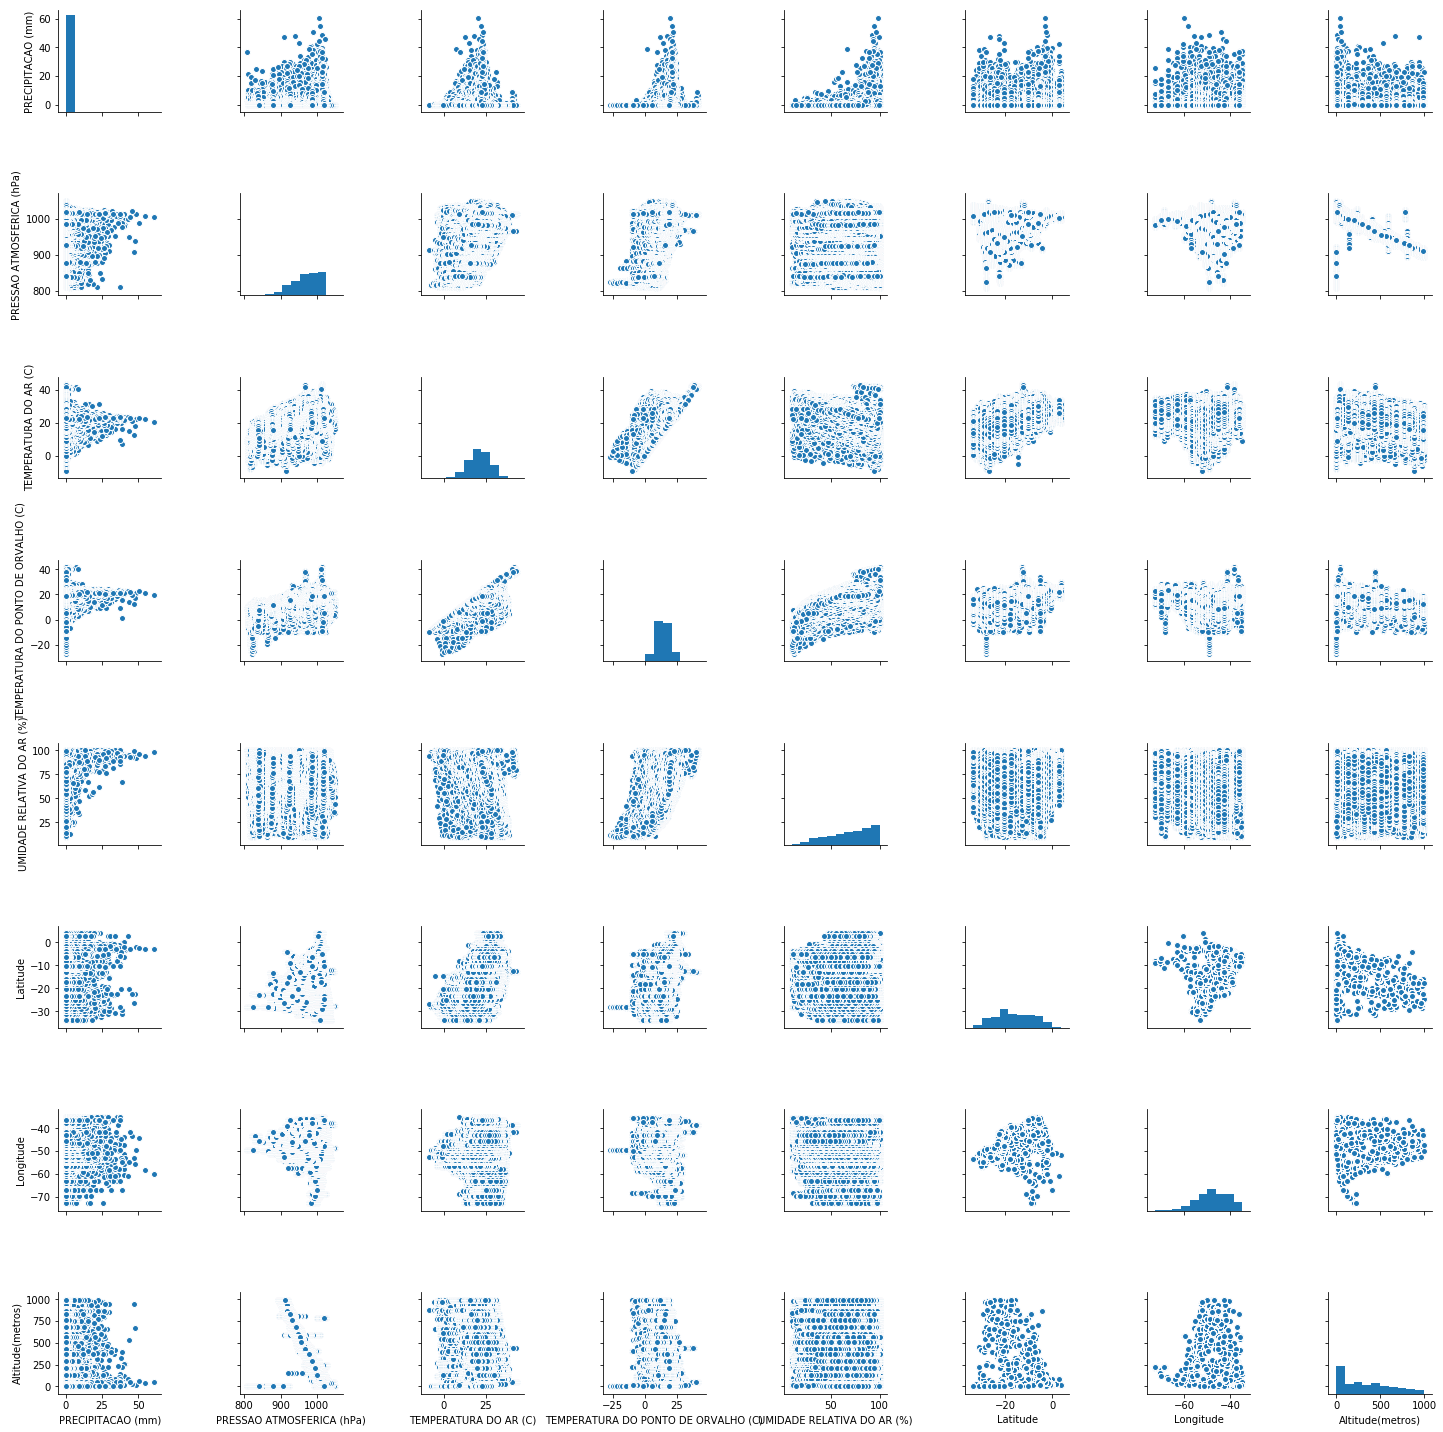

In [60]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

#### Como podemos ver existe alguns dados fora do padrão dos demais registro, como os dados de Pressão atmosferica que podemos perceber que sua relação com Altidude não esta muito correta. iremos retirar este dados também

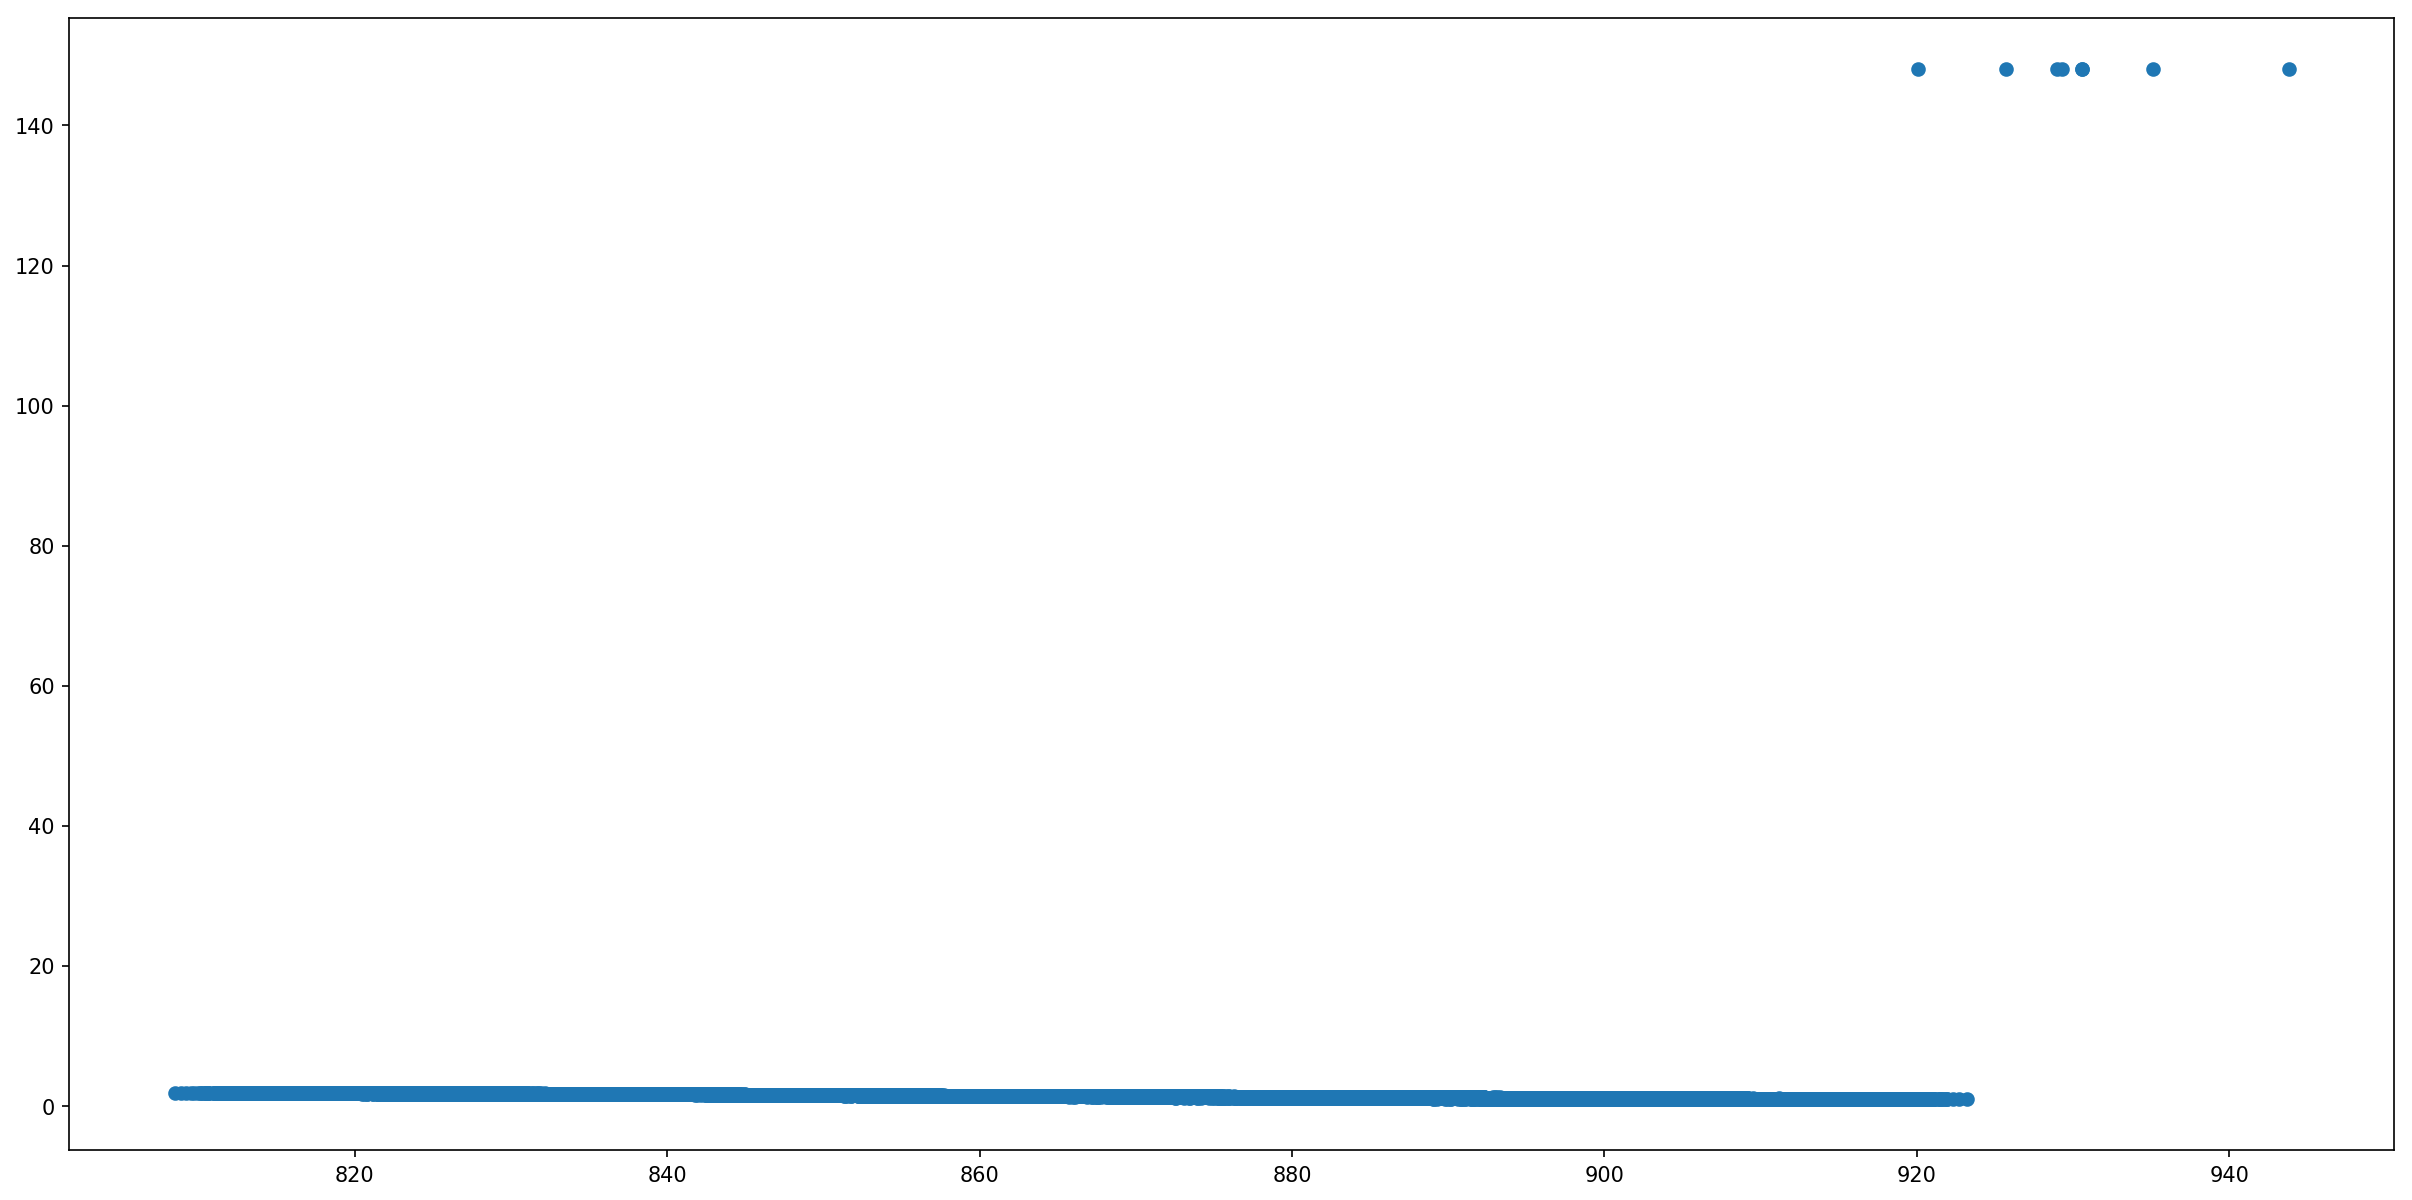

In [61]:
plt.figure(figsize=(20, 10), dpi=150)
plt.scatter(data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:]['PRESSAO ATMOSFERICA (hPa)'],
           data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:]['Altitude(metros)'])


In [62]:
data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:].head(10)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
437496             1.161     86715.0    1       0 -15.789343 -47.925756   
437497             1.161     86715.0    1       1 -15.789343 -47.925756   
437498             1.161     86715.0    1       2 -15.789343 -47.925756   
437499             1.161     86715.0    1       3 -15.789343 -47.925756   
437500             1.161     86715.0    1       4 -15.789343 -47.925756   
437501             1.161     86715.0    1       5 -15.789343 -47.925756   
437502             1.161     86715.0    1       6 -15.789343 -47.925756   
437503             1.161     86715.0    1       7 -15.789343 -47.925756   
437504             1.161     86715.0    1       8 -15.789343 -47.925756   
437505             1.161     86715.0    1       9 -15.789343 -47.925756   

        Month           Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
437496      7  Brasília-A001                0.0                      889.1   
437497      7  Brasília-A001                0.0                      889.4   
437498      7  Brasília-A001                0.0                      889.3   
437499      7  Brasília-A001                0.0                      889.0   
437500      7  Brasília-A001                0.0                      888.7   
437501      7  Brasília-A001                0.0                      888.3   
437502      7  Brasília-A001                0.0                      887.7   
437503      7  Brasília-A001                0.0                      887.5   
437504      7  Brasília-A001                0.0                      887.7   
437505      7  Brasília-A001                0.0                      887.8   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
437496                             889.1                             888.8   
437497                             889.4                             889.1   
437498                             889.4                             889.3   
437499                             889.3                             889.0   
437500                             889.1                             888.7   
437501                             888.7                             888.2   
437502                             888.3                             887.7   
437503                             887.8                             887.5   
437504                             887.7                             887.5   
437505                             887.8                             887.7   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
437496                      NaN                   19.6   
437497                      NaN                   20.1   
437498                      NaN                   19.6   
437499                      NaN                   18.3   
437500                      NaN                   17.8   
437501                      NaN                   16.2   
437502                      NaN                   16.5   
437503                      NaN                   16.3   
437504                      NaN                   15.2   
437505                      NaN                   14.9   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
437496                                  7.2                    20.7   
437497                                  5.8                    20.2   
437498                                  4.3                    20.2   
437499                                  5.5                    19.7   
437500                                  6.9                    18.2   
437501                                  7.8                    17.8   
437502                                  7.7                    16.9   
437503                                  7.0                    16.6   
437504                                  7.1                    16.3   
437505                                  7.1                    15.4   

        TEMPERATURA MINIMA (C)  TEMPERATURA

In [63]:
errors = data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<955),:].index.tolist()
print('Numero de resgitros que serão retirados: {}'.format(len(errors)))
data.loc[errors,'PRESSAO ATMOSFERICA (hPa)'] = np.nan

Numero de resgitros que serão retirados: 188524


In [64]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.130279
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             10.485148
PRESSAO ATMOSFERICA (hPa)                     14.358104
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               8.905082
PRESSAO ATMOSFÉRICA MINIMA (hPa)               8.904207
RADIACAO GLOBAL (KJ/M2)                       55.544602
TEMPERATURA DO AR (C)                          8.490695
TEMPERATURA DO PONTO DE ORVALHO (C)            9.503914
TEMPERATURA MAXIMA (C)                         8.500647
TEMPERATURA MINIMA (C)                         8.506163
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

## Retirando os dados ausentes

### por trabalhamos com medias não iremos fazer recuperação dos dados ausentes apenas discarta-los.
### mas primeiro iremos descarta o atribulto de radiação global, que ja ele esta ausente em 50% da base

In [65]:
data.drop(columns=['RADIACAO GLOBAL (KJ/M2)','VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)'],inplace=True)

In [66]:
data.dropna(inplace=True)

In [67]:
data.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv')

In [68]:
data.describe().T

count          mean  \
Altitude(metros)                            2819525.0    375.614392   
Codigo OMM                                  2819525.0  85318.710302   
Day                                         2819525.0     16.038843   
H(UTC)                                      2819525.0     11.567960   
Latitude                                    2819525.0    -15.692495   
Longitude                                   2819525.0    -47.598233   
Month                                       2819525.0      7.000000   
PRECIPITACAO (mm)                           2819525.0      0.077396   
PRESSAO ATMOSFERICA (hPa)                   2819525.0    974.028068   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2819525.0    974.288329   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2819525.0    973.773342   
TEMPERATURA DO AR (C)                       2819525.0     21.288732   
TEMPERATURA DO PONTO DE ORVALHO (C)         2819525.0     14.479491   
TEMPERATURA MAXIMA (C)                      2819525.0     21.980407   
TEMPERATURA MINIMA (C)                      2819525.0     20.620484   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2819525.0     14.999904   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2819525.0     13.977036   
UMIDADE RELATIVA DO AR (%)                  2819525.0     69.378092   
UMIDADE RELATIVA DO MAXIMA AR (%)           2819525.0     72.162027   
UMIDADE RELATIVA DO MINIMA AR (%)           2819525.0     66.562192   
Year                                        2819525.0   2011.495059   

                                                    std           min  \
Altitude(metros)                             284.838499      1.161000   
Codigo OMM                                  2274.138212  81609.000000   
Day                                            8.949712      1.000000   
H(UTC)                                         6.928736      0.000000   
Latitude                                       8.173726    -33.742297   
Longitude                                      6.826048    -72.786778   
Month                                          0.000000      7.000000   
PRECIPITACAO (mm)                              0.666332      0.000000   
PRESSAO ATMOSFERICA (hPa)                     31.456411    893.700000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              31.468655    889.500000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              31.445284    889.100000   
TEMPERATURA DO AR (C)                          6.333713     -6.100000   
TEMPERATURA DO PONTO DE ORVALHO (C)            5.009290     -9.900000   
TEMPERATURA MAXIMA (C)                         6.440837     -6.100000   
TEMPERATURA MINIMA (C)                         6.216264     -9.800000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     4.957160     -9.400000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     5.072222    -13.900000   
UMIDADE RELATIVA DO AR (%)                    21.214325     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             20.493530     10.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             21.727053     10.000000   
Year                                           3.113780   2000.000000   

                                                     25%           50%  \
Altitude(metros)                              112.000000    340.000000   
Codigo OMM                                  81965.000000  86721.000000   
Day                                             8.000000     16.000000   
H(UTC)                                          6.000000     12.000000   
Latitude                                      -22.119867    -15.751536   
Longitude                                     -52.398090    -48.111839   
Month                                           7.000000      7.000000   
PRECIPITACAO (mm)                               0.000000      0.000000   
PRESSAO ATMOSFERICA (hPa)                     951.200000    977.000000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              951.400000    977.300000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              950.900000    976.

### Fazendo a base de dados com as medias mensais de cada estação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
month_num = str(7)
data = pd.read_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv').drop(columns=['Unnamed: 0'])
data.head(7)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      7   
1             185.0     81963.0    1       1 -9.358353 -69.926257      7   
2             185.0     81963.0    1       3 -9.358353 -69.926257      7   
3             185.0     81963.0    1       7 -9.358353 -69.926257      7   
4             185.0     81963.0    1       8 -9.358353 -69.926257      7   
5             185.0     81963.0    1       9 -9.358353 -69.926257      7   
6             185.0     81963.0    1      13 -9.358353 -69.926257      7   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   
5  Parque Estadual Chandless-A102                0.0   
6  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)   ...    TEMPERATURA MINIMA (C)  \
0                      989.7   ...                      22.8   
1                      990.3   ...                      22.3   
2                      990.7   ...                      21.5   
3                      990.3   ...                      20.5   
4                      990.1   ...                      20.4   
5                      990.5   ...                      20.3   
6                      993.1   ...                      21.1   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        22.3   
1                                        21.8   
2                                        21.2   
3                                        20.4   
4                                        20.1   
5                                        20.0   
6                                        23.5   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        21.8                        94.0   
1                                        21.5                        95.0   
2                                        20.8                        96.0   
3                                        19.9                        96.0   
4                                        19.8                        96.0   
5                                        19.7                        97.0   
6                                        20.5                        93.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  Year  \
0                               94.0                               93.0  2009   
1                               95.0                               94.0  2009   
2                               96.0                               95.0  2009   
3                               97.0                               96.0  2009   
4                               97.0                               96.0  2009   
5                               97.0                               96.0  2009   
6                               97.0                               93.0  2009   

                      Cidade  Estado  Regiao  
0  Parque Estadual Chandless    Acre   Norte  
1  Parque Estadual Chandless    Acre   Norte  
2  Parque Estadual Chandless    Acre   Norte  
3  Parque Estadual Chandless    Acre   Norte  
4  Parque Estadual Chandless    Acre   Norte  
5  Parque Estadual Chandless    Acre   Norte  
6  Parque Estadual Chandless    Acre   Norte  

[7 rows x 25 columns]

In [2]:
data_mean = data.groupby(['Nome']).agg('mean')
data_mean.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_mean.csv')
data_mean.head(5)

Altitude(metros)  Codigo OMM        Day     H(UTC)  \
Nome                                                                      
Abrolhos-A422                    21.0     86765.0  15.996760  11.493521   
Acaraú-A360                      67.0     81755.0  16.039113  11.504910   
Afonso Cláudio-A657             507.0     86827.0  16.002151  11.502017   
Aimorés-A534                    288.0     86803.0  16.010157  11.578757   
Alegre-A617                     129.0     86828.0  15.998728  11.608309   

                      Latitude  Longitude  Month  PRECIPITACAO (mm)  \
Nome                                                                  
Abrolhos-A422       -17.963016 -38.703288    7.0           0.039417   
Acaraú-A360          -3.121067 -40.087288    7.0           0.024382   
Afonso Cláudio-A657 -20.104194 -41.106861    7.0           0.023071   
Aimorés-A534        -19.532768 -41.090801    7.0           0.023481   
Alegre-A617         -20.750412 -41.488852    7.0           0.037813   

                     PRESSAO ATMOSFERICA (hPa)  \
Nome                                             
Abrolhos-A422                      1017.442468   
Acaraú-A360                        1005.880359   
Afonso Cláudio-A657                 961.439796   
Aimorés-A534                        991.382579   
Alegre-A617                        1004.736103   

                     PRESSAO ATMOSFÉRICA MAXIMA (hPa)     ...       \
Nome                                                      ...        
Abrolhos-A422                             1017.657235     ...        
Acaraú-A360                               1006.125550     ...        
Afonso Cláudio-A657                        961.661603     ...        
Aimorés-A534                               991.619728     ...        
Alegre-A617                               1004.986082     ...        

                     TEMPERATURA DO AR (C)  \
Nome                                         
Abrolhos-A422                    24.190848   
Acaraú-A360                      26.483881   
Afonso Cláudio-A657              19.405351   
Aimorés-A534                     21.722155   
Alegre-A617                      20.804154   

                     TEMPERATURA DO PONTO DE ORVALHO (C)  \
Nome                                                       
Abrolhos-A422                                  19.080616   
Acaraú-A360                                    20.702066   
Afonso Cláudio-A657                            13.886959   
Aimorés-A534                                   15.331727   
Alegre-A617                                    15.037756   

                     TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
Nome                                                                  
Abrolhos-A422                     24.548029               23.851809   
Acaraú-A360                       27.103149               25.904673   
Afonso Cláudio-A657               20.092148               18.761280   
Aimorés-A534                      22.400121               21.112842   
Alegre-A617                       21.515430               20.131101   

                     TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         19.588715   
Acaraú-A360                                           21.152049   
Afonso Cláudio-A657                                   14.321108   
Aimorés-A534                                          15.787175   
Alegre-A617                                           15.534549   

                     TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         18.574892   
Acaraú-A360                                           20.260938   
Afonso Cláudio-A657                                   13.457005   
Aimorés-A534                                          14.895077   
Alegre-A617                              

In [3]:
data_mean['Precipitação Acum.(mm)'] = data.groupby(['Nome','Year']).agg('sum').groupby('Nome').agg('mean')['PRECIPITACAO (mm)']

data_mean.to_csv('./Tempo-Clima/Dados/Brasil_7_mean.csv')

In [4]:
data_mean.describe().T

count          mean          std  \
Altitude(metros)                            467.0    366.839745   282.822694   
Codigo OMM                                  467.0  85230.299786  2312.301895   
Day                                         467.0     16.028319     0.561838   
H(UTC)                                      467.0     11.559463     0.226912   
Latitude                                    467.0    -15.379002     8.227039   
Longitude                                   467.0    -47.967093     7.213583   
Month                                       467.0      7.000000     0.000000   
PRECIPITACAO (mm)                           467.0      0.076520     0.083894   
PRESSAO ATMOSFERICA (hPa)                   467.0    974.856763    30.987094   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            467.0    974.845937    31.182594   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            467.0    974.331546    31.164814   
TEMPERATURA DO AR (C)                       467.0     21.428758     4.361472   
TEMPERATURA DO PONTO DE ORVALHO (C)         467.0     14.622087     4.063412   
TEMPERATURA MAXIMA (C)                      467.0     22.125319     4.411764   
TEMPERATURA MINIMA (C)                      467.0     20.754905     4.319171   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  467.0     15.149514     4.055931   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  467.0     14.113819     4.076802   
UMIDADE RELATIVA DO AR (%)                  467.0     69.517156    11.790551   
UMIDADE RELATIVA DO MAXIMA AR (%)           467.0     72.259530    11.501585   
UMIDADE RELATIVA DO MINIMA AR (%)           467.0     66.610505    12.026824   
Year                                        467.0   2011.852785     1.395611   
Precipitação Acum.(mm)                      467.0     53.323147    59.366311   

                                                     min           25%  \
Altitude(metros)                                1.161000    111.000000   
Codigo OMM                                  81609.000000  81952.500000   
Day                                             5.750000     15.951357   
H(UTC)                                          7.500000     11.500000   
Latitude                                      -33.742297    -21.818064   
Longitude                                     -72.786778    -52.882993   
Month                                           7.000000      7.000000   
PRECIPITACAO (mm)                               0.000000      0.011619   
PRESSAO ATMOSFERICA (hPa)                     907.332957    953.696769   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              890.525000    953.792560   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              889.950000    953.302803   
TEMPERATURA DO AR (C)                          10.860840     18.867691   
TEMPERATURA DO PONTO DE ORVALHO (C)             7.618140     11.322636   
TEMPERATURA MAXIMA (C)                         11.447157     19.453876   
TEMPERATURA MINIMA (C)                         10.307892     18.103322   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)      8.121935     11.902262   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)      7.136024     10.792832   
UMIDADE RELATIVA DO AR (%)                     42.830816     59.970842   
UMIDADE RELATIVA DO MAXIMA AR (%)              45.489462     63.345097   
UMIDADE RELATIVA DO MINIMA AR (%)              39.470292     56.564193   
Year                                         2003.500000   2011.321008   
Precipitação Acum.(mm)                          0.000000      8.211111   

                                                     50%           75%  \
Altitude(metros)                              324.000000    562.000000   
Codigo OMM                                  86710.000000  86853.500000   
Day                                            16.000000     16.134801   
H(UTC)                                         11.523430     11.594776   
Latitude                                      -15.300159     -8.632726   
Longitude                                     -48.177259

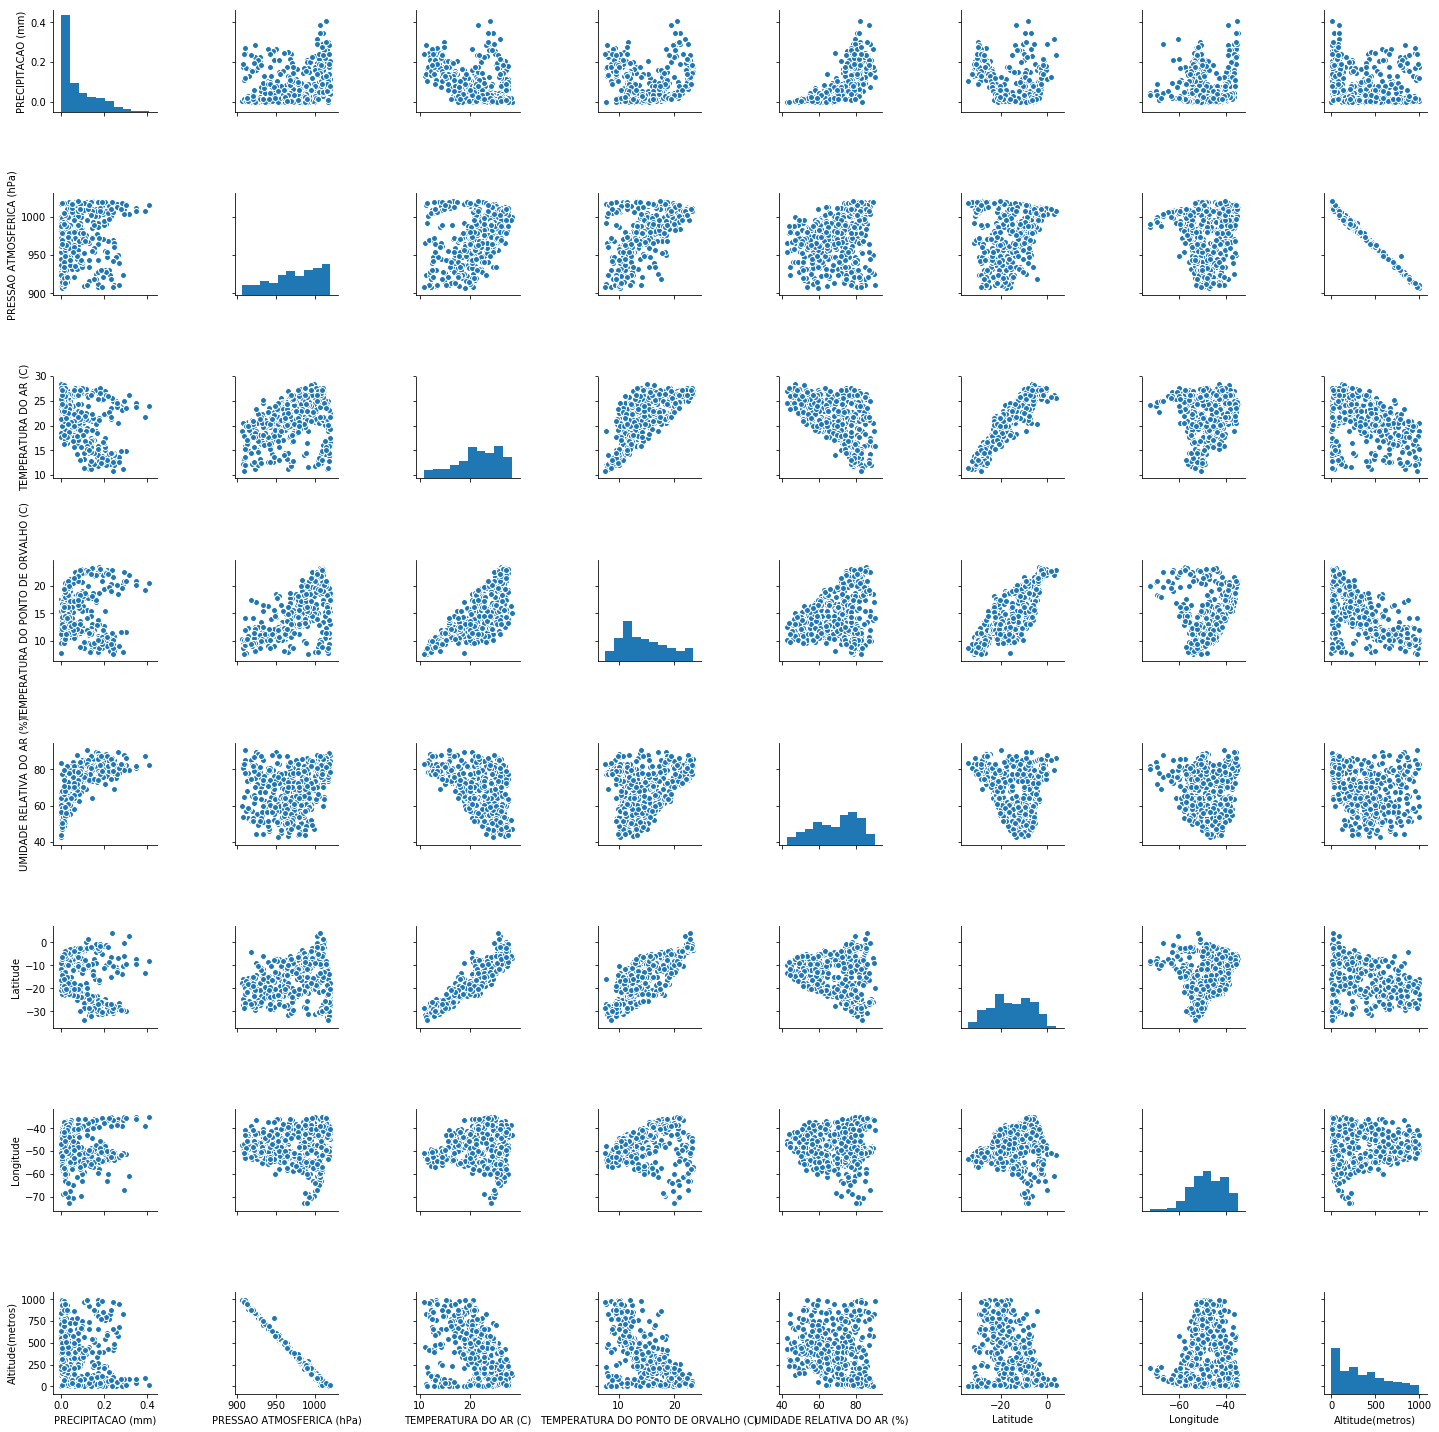

In [71]:
sns.pairplot(data_mean[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [72]:
target_wanderlay = ['UMIDADE RELATIVA DO AR (%)']
features_UR_wanderlay = data_mean.columns.tolist()
features_UR_wanderlay.remove('Day')
features_UR_wanderlay.remove('Month')
features_UR_wanderlay.remove('Codigo OMM')
features_UR_wanderlay.remove('Year')
features_UR_wanderlay.remove('H(UTC)')
#features_UR_wanderlay.remove('VENTO VELOCIDADE ')
#features_UR_wanderlay.remove('VENTO, DIRECAO (graus)')
#features_UR_wanderlay.remove('VENTO, RAJADA MAXIMA (m/s)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_UR_wanderlay.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO AR (C)')
#features_UR_wanderlay.remove('TEMPERATURA MAXIMA (C)')
#features_UR_wanderlay.remove('TEMPERATURA MINIMA (C)')
features_UR_wanderlay.remove('PRECIPITACAO (mm)')
features_UR_wanderlay.remove('PRESSAO ATMOSFERICA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')




features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

In [75]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)


In [76]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))

Variance: 0.9217100909076514
Erro absoluto medio: 2.5281866190462985
Erro quadrado medio: 9.548407452258521
Erro absoluto mediano: 2.3629680509255024
R2 Score: 0.9217077489085375


In [77]:
errors=abs(scaler_y.inverse_transform(y_test).ravel()-scaler_y.inverse_transform([y_pred,]))
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(UR_true - UR_pred)
MIN: 0.019804625509721063 	MAX: 8.7886048822281 	MEAN: 2.5281866190462985	Std: 1.7767047789471873


In [78]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform(y_test).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
93   43.796125  43.796125
104  44.048394  44.048394
105  48.532684  48.532684
59   49.425630  49.425630
39   49.832102  49.832102

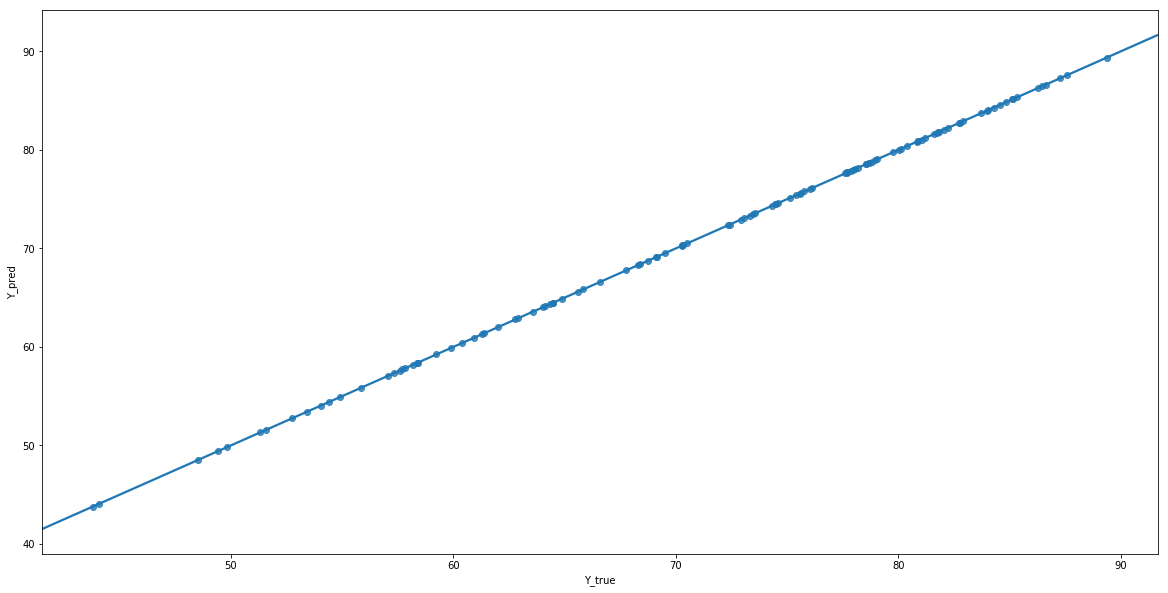

In [79]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)

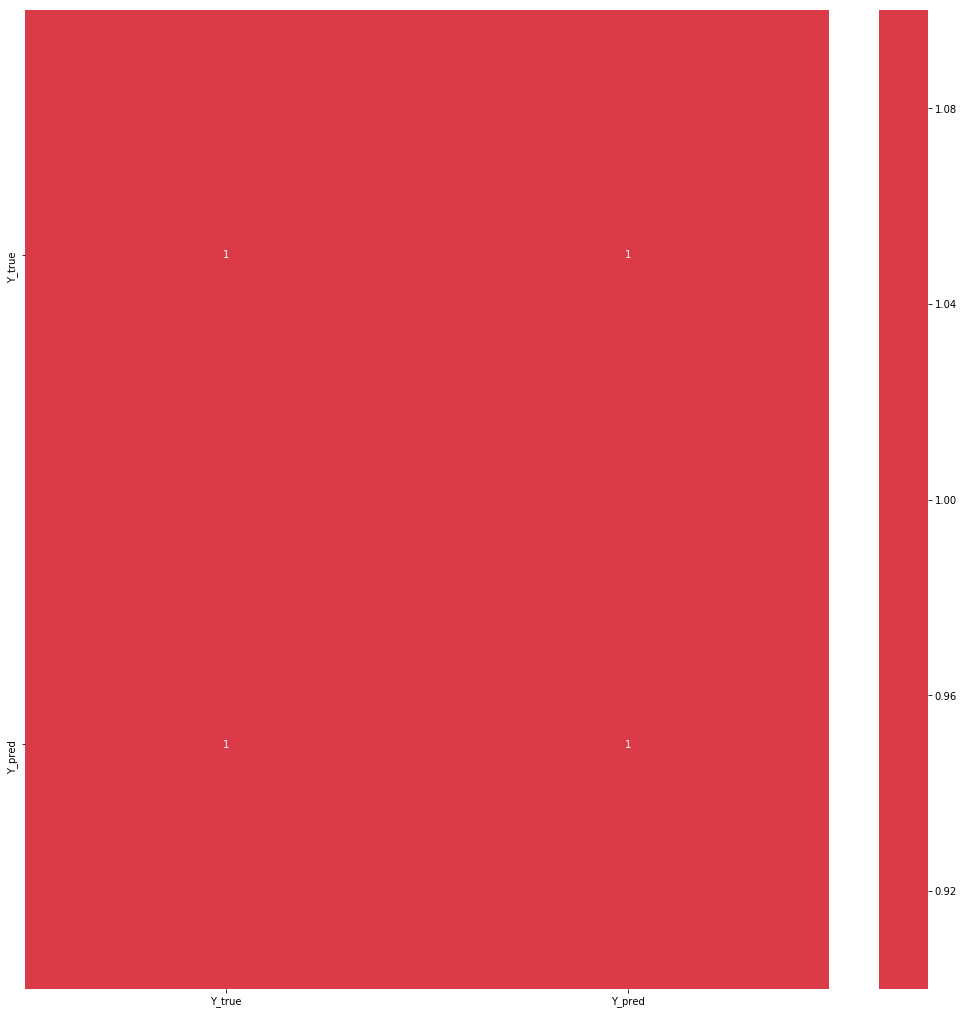

In [80]:
cor_matrix = df_rest.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()